# Phase 0 - Problem Scoping & Problem Description

Matthew Blake - mblake@blake-tech.com

The challenge we are addressing involves how we can effectively differentiate between legitimate websites and phishing websites. In the modern digital landscape, users routinely use websites for a multitude of purposes; thus, online security is paramount.

Phishing is a form of cybercrime that entails the creation of deceptive websites with the intent of deceiving users into divulging sensitive information, engaging in harmful actions, or falling victim to fraudulent activities.

There are a few groups of people that fall under the umbrella of "stakeholders". This includes the following groups:

1) Internet Users: These are everyday users who access websites for a variety of purposes, from shopping to banking. They are at the forefront of this problem, since they are the most likely to be a potential victim of phishing attacks.
2) Website Administrators: Those responsible for maintaining and securing websites. They aim to protect their platforms and user data from malicious activities.
3) Cybersecurity Experts: Professionals in cybersecurity who aim to develop strategies to combat cyber threats and protect individual's sensitive data.
4) Organization/Businesses: This encompasses any entity that operates online services, such as e-commerce platforms, banks, and social media networks. They have a vested interest in maintaining the trust and security of their online services to protect their brand and customers.

The importance of this problem boils down to the fact that phishing attacks have the potential to compromise sensitive personal and financial information, presenting a significant threat to individual security and privacy. Victims of phishing scams may experience identity theft, and unauthorized access to their financial accounts. From a business perspective, it’s import to preserve trust between themselves and potential consumers. When this trust is eroded due to security concerns, it could lead to hesitancy to engage in online commerce. It is important for this problem to be tackled and solutions to start emerging in order to create a more safe and secure digital environment.

Phishing attacks have been on the rise in recent years. The Anti-Phishing Working Group, or AWPG, is a coalition of individuals such as cybercrime responders, investors, and law enforcement agencies that focus on eliminating identity theft and frauds that are the result of phishing and other similar cyber attacks. AWPG reported that in the third quarter of 2023, there were a total of 1,270,883 phishing attacks, a record number that made Q3 2023 the worst observed [1]. This illustrates the sentiment that phishing attacks are becoming much more commonplace on the Internet. As a result, we need to start leveraging tools such as AI and machine learning to help us in this endeavor.


Machine learning algorithms present a compelling solution in helping efficiently distinguish legitimate websites from phishing ones. This is not a simple solution, since the nature of this problem has different characteristics and anomalies depending on the malicious actor in question. However, there are obvious benefits to leveraging a machine learning algorithm. First, they excel at pattern recognition and thus can see subtle features and behaviors that may elude traditional rule-based systems. In this case, this may come in URL structure, content analysis, and user behavior. They are also incredible at adapting and scaling to the dataset that we provide. In our case, we have a fixed number of cases, but in theory, it can handle the size and complexity of an extremely large dataset. Finally, the efficiency that it has helps with the processing and analysis of web data, allowing us to come to actions or conclusions at a more rapid pace. One main downside to these models is concerns about data quality. Machine learning models are highly dependent on the quality of the data it is trained on. If the representativeness of the data is not of a good quality, it can result in skewed or inaccurate predictions.

There are a few research questions that we have at the start of our project:

1) Can machine learning models effectively differentiate between legitimate and phishing websites based on the URL and web page features?
    
2) What features are the most important in distinguishing between legitimate and phishing websites?
    
3) How can we optimize our model so that it could keep up with phishing tactic development over time?

4) What are the practical implications and limitations to implementing machine learning-based phishing detection in the real world?


[1] Anti-Phishing Working Group. (2022, December 12). Phishing Attack Trends Report - 3Q 2022. https://apwg.org/trendsreports/.


# Project Phase I - Data Preprocessing

First, before we begin the preprocessing, we need to import Pandas, which is the main library we will be leveraging throughout this project.

## Preparing Our Data

In [2]:
import pandas as pd

Now, we can import and display the training data we will be working with:

In [3]:
# import data set
df = pd.read_csv("Phishing_Legitimate_train_missing_data.csv", index_col="id", na_values=['',' ','n/a'])
df.head()

,NumDots,SubdomainLevel,PathLevel,UrlLength,NumDash,NumDashInHostname,AtSymbol,TildeSymbol,NumUnderscore,NumPercent,...,InsecureForms,RelativeFormAction,ExtFormAction,AbnormalFormAction,RightClickDisabled,PopUpWindow,IframeOrFrame,MissingTitle,ImagesOnlyInForm,CLASS_LABEL
id,,,,,,,,,,,,,,,,,,,,,
1,3.0,1.0,5.0,81.0,1.0,1.0,0.0,0.0,1.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
2,2.0,0.0,5.0,78.0,1.0,1.0,0.0,0.0,3.0,0.0,...,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
3,3.0,0.0,4.0,53.0,1.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1
4,3.0,1.0,6.0,68.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
5,3.0,0.0,3.0,61.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1


In [4]:
data_types = df.dtypes
print(set(data_types.values))

{dtype('int64'), dtype('float64')}


All of our data types are numerical, so we do not to convert any columns from objects to numerical data types such as int or float.

## Removing Missing Values

Now that we've imported the training data in, we can start by removing the missing values from our newly create dataframe.

This process is shown below:

In [5]:
nan_rows_mask = df.isna().any(axis=1) # Create a boolean mask to identify rows with a NaN value
nan_row_indexes = df.index[nan_rows_mask] # Get the row indexes where any column contains NaN
nan_df = df.loc[nan_row_indexes] # Display the rows with NaN values
nan_row_indexes_list = nan_df.index
nan_df

,NumDots,SubdomainLevel,PathLevel,UrlLength,NumDash,NumDashInHostname,AtSymbol,TildeSymbol,NumUnderscore,NumPercent,...,InsecureForms,RelativeFormAction,ExtFormAction,AbnormalFormAction,RightClickDisabled,PopUpWindow,IframeOrFrame,MissingTitle,ImagesOnlyInForm,CLASS_LABEL
id,,,,,,,,,,,,,,,,,,,,,
7,NaN,0.0,1.0,NaN,0.0,0.0,0.0,0.0,2.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
23,2.0,0.0,1.0,NaN,12.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0
27,4.0,1.0,3.0,72.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
145,1.0,0.0,6.0,NaN,12.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0
150,3.0,1.0,3.0,56.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1
419,3.0,1.0,5.0,73.0,1.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
831,1.0,0.0,0.0,30.0,1.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
903,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0
980,2.0,0.0,3.0,52.0,1.0,NaN,NaN,NaN,NaN,NaN,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1


### Data Imputation Process

We've now created a DataFrame that contains all of the rows at least one NaN (not a number) value.

However, we are now faced with a decision regarding our model. There are rows that contain multiple NaN values. If we were to impute them, how accurate would the data we imput be? There is a large section of data that is missing in these rows, so we believe that there is doubt regarding the accuracy of the data that has been imputed in them. As a result, for our model, we have decided to remove them.

Data completeness is important when we are training our machine learning model, since missing values can hinder or compromise our model's performance. This, in turn, could lead to biased or inaccurate predictions. To address this, we will be utilizing data imputation to ensure that our model receives the necessary information for effective decision-making. 

The decision to remove these rows is aimed to maintain/create a high-quality dataset that we will be using for our model's training. This approach ensures that our model's predictions are based on the most complete and accurate dataset available.

With all of that said, let's start our imputation process by first remove all of the rows that have more than 3 missing values:

In [6]:
# Check for NaN values in each row and count them
nan_counts = nan_df.isna().sum(axis=1)

# Identify rows with more than 3 NaN values
remove_list = nan_counts[nan_counts > 3].index

# Remove the identified rows from the dataframe
df.drop(index=remove_list, inplace=True)

print("Dropped rows:", list(remove_list))
print(df.shape)  # Display the shape of the remaining dataframe

Dropped rows: [903, 980, 1760, 1821, 2776, 2777, 2778, 2779, 2780]
(4991, 38)


Great! We've successfully removeed the rows that had 3 or more missing values.

Let's now look at the remaining rows that contain NaNs within them:

In [7]:
nan_rows_mask = df.isna().any(axis=1) # Create a boolean mask to identify rows with a NaN value
nan_row_indexes = df.index[nan_rows_mask] # Get the row indexes where any column contains NaN
nan_df = df.loc[nan_row_indexes] # Display the rows with NaN values
nan_row_indexes_list = nan_df.index
nan_df

,NumDots,SubdomainLevel,PathLevel,UrlLength,NumDash,NumDashInHostname,AtSymbol,TildeSymbol,NumUnderscore,NumPercent,...,InsecureForms,RelativeFormAction,ExtFormAction,AbnormalFormAction,RightClickDisabled,PopUpWindow,IframeOrFrame,MissingTitle,ImagesOnlyInForm,CLASS_LABEL
id,,,,,,,,,,,,,,,,,,,,,
7,NaN,0.0,1.0,NaN,0.0,0.0,0.0,0.0,2.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
23,2.0,0.0,1.0,NaN,12.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0
27,4.0,1.0,3.0,72.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
145,1.0,0.0,6.0,NaN,12.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0
150,3.0,1.0,3.0,56.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1
419,3.0,1.0,5.0,73.0,1.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
831,1.0,0.0,0.0,30.0,1.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
1011,2.0,1.0,3.0,64.0,1.0,0.0,0.0,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
1015,3.0,1.0,4.0,101.0,10.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0


All of these rows have no more than 3 missing values.

While these rows still have NaN values, none of them have more than 3 missing values. This provides us with the confidence to impute data into these rows and have confidence regarding the accuracy of our model with these datapoints included into it.

### Imputing Rows

After removing all of the rows that have more than 3 missing values, we still have some rows with some missing values. This finally lets us utilize data imputation to fix these rows. Imputing data that will replace our missing values will fill up some holes in our data.

First, we need to find the columns that are associated with the cells we need to impute:

In [8]:
columns_with_nan = df.columns[df.isna().any()].tolist()
columns_with_nan

['NumDots',
 'UrlLength',
 'NumDashInHostname',
 'NumPercent',
 'NumQueryComponents',
 'NumHash',
 'NumNumericChars',
 'DomainInPaths',
 'HostnameLength',
 'QueryLength',
 'PctExtResourceUrls']

Great! Now, let's output the DataFrame. This DataFrame should no longer have any missing values in it after we impute it:


In [9]:
from sklearn.impute import KNNImputer

imputer = KNNImputer(n_neighbors=10)
questions = df[columns_with_nan].to_numpy() 
questions_imputed = imputer.fit_transform(questions)
df[columns_with_nan]=questions_imputed
df.loc[nan_row_indexes_list] # Display imputed data

,NumDots,SubdomainLevel,PathLevel,UrlLength,NumDash,NumDashInHostname,AtSymbol,TildeSymbol,NumUnderscore,NumPercent,...,InsecureForms,RelativeFormAction,ExtFormAction,AbnormalFormAction,RightClickDisabled,PopUpWindow,IframeOrFrame,MissingTitle,ImagesOnlyInForm,CLASS_LABEL
id,,,,,,,,,,,,,,,,,,,,,
7,2.9,0.0,1.0,110.6,0.0,0.0,0.0,0.0,2.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
23,2.0,0.0,1.0,116.7,12.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0
27,4.0,1.0,3.0,72.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
145,1.0,0.0,6.0,92.2,12.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0
150,3.0,1.0,3.0,56.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1
419,3.0,1.0,5.0,73.0,1.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
831,1.0,0.0,0.0,30.0,1.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
1011,2.0,1.0,3.0,64.0,1.0,0.0,0.0,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
1015,3.0,1.0,4.0,101.0,10.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0


Perfect! There are no longer any missing values in our data set.

# Data Encoding & Clearing Outliers

Data encoding is important because it ensures or model will be able to interpet and learn from bianary or categorical feature of our data.

We will not have to encode any of the discrete or continuous data beacause they can already be interpreted, however we will have to remove outliers from these columns.

The following columns have been identified as discrete/continuous data:

- NumDots
- SubdomainLevel
- PathLevel
- UrlLength
- NumDash
- NumDashInHostname
- NumUnderscore
- NumPercent
- NumQueryComponents
- NumAmpersand
- NumHash
- NumNumericChars
- HostnameLength
- PathLength
- QueryLength
- NumSensitiveWords
- PctExtResourceUrls


We can use z-scores to find and remove outliers from our data set. 

The z-score measures how many standard deviations a data point is from the mean. You can use it to detect and remove outliers. A common threshold for considering data as an outlier is if the z-score is beyond a 3.

Let's run our z-score check to update the dataframe to include only the data that passes that check; that is, columns that do not have a z-score greater than 3:

In [10]:
from scipy import stats

# Print current DataFrame shape for comparison
print(df.shape)

# Define columns that we will check for outliers
numerical_cols = ["NumDots", "SubdomainLevel", "PathLevel", "UrlLength", "NumDash", "NumDashInHostname", "NumUnderscore", "NumPercent", "NumQueryComponents", "NumAmpersand", "NumHash", "NumNumericChars", "HostnameLength", "PathLength", "QueryLength", "NumSensitiveWords", "PctExtResourceUrls"]

# Define a z-score threshold
z_threshold = 3

# Calculate z-scores for the selected columns
z_scores = stats.zscore(df[numerical_cols].astype(float))

# Create a boolean mask to identify outliers
outlier_mask = (abs(z_scores) <= z_threshold).all(axis=1)

# Update our DataFrame to only include data that are not outliers
df = df[outlier_mask]

# Print new DataFrame shape for comparison
print(df.shape)
df

(4991, 38)
(4250, 38)


,NumDots,SubdomainLevel,PathLevel,UrlLength,NumDash,NumDashInHostname,AtSymbol,TildeSymbol,NumUnderscore,NumPercent,...,InsecureForms,RelativeFormAction,ExtFormAction,AbnormalFormAction,RightClickDisabled,PopUpWindow,IframeOrFrame,MissingTitle,ImagesOnlyInForm,CLASS_LABEL
id,,,,,,,,,,,,,,,,,,,,,
1,3.0,1.0,5.0,81.0,1.0,1.0,0.0,0.0,1.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
2,2.0,0.0,5.0,78.0,1.0,1.0,0.0,0.0,3.0,0.0,...,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
3,3.0,0.0,4.0,53.0,1.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1
4,3.0,1.0,6.0,68.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
5,3.0,0.0,3.0,61.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4996,3.0,1.0,1.0,67.0,3.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0
4997,1.0,0.0,2.0,36.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0
4998,3.0,2.0,0.0,33.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0


## Data Encoding

All of our features hold data that is either discrete, continuous, or bianary.

Since all of the data is already ready for processing (no ordinal data), we do not need to encode our data.

# Data Normalization

Now it's time to reshape our data into a common scale. Using min/max normalization, we can scale our data without distorting its underlying structure.

There are multiple columns in this data set that measure the amount of unusual characters in a URL:
- NumDots
- NumDash
- NumDashInHostname
- NumUnderscore
- NumPercent
- NumAmpersand
- NumHash

We can normalize these columns into one column called "URLCharacterComplexity"

In [11]:
import numpy as np

df["URLCharacterComplexity"] = np.mean(df[["NumDots", "NumDash", "NumDashInHostname", "NumUnderscore", "NumPercent", "NumAmpersand", "NumHash"]],axis=1)
max_URL_Character_Complexity = df['URLCharacterComplexity'].max()
min_URL_Character_Complexity = df['URLCharacterComplexity'].min()
df["URLCharacterComplexity"] = (df["URLCharacterComplexity"]-min_URL_Character_Complexity)/(max_URL_Character_Complexity-min_URL_Character_Complexity)
df["URLCharacterComplexity"]

id
1       0.3125
2       0.3750
3       0.1875
4       0.1250
5       0.1250
         ...  
4996    0.3125
4997    0.0625
4998    0.1250
4999    0.1250
5000    0.0000
Name: URLCharacterComplexity, Length: 4250, dtype: float64

## Takeaways

**Abnormal Observations**

As we worked through the data, we noticed that the blank data came in different forms.

Some blank cells had no spaces ("") while some did (" ").

the **pandas.DataFrame.isna()** function only detects compeltely blank cells (""), not cells with spaces (" "). So we couldn't rely on that function to detect all of the missing values.

**Recommended Strategies**

**pandas.read_csv()** has an argument called **na_values**. This argument allows us to imput custom values that will be considered as NaN. For example, cells with an empty space (" "). To implement this change, we imput " " as part of a list.

In [12]:
# df = pd.read_csv("example.csv", na_values=["", " ", "n/a"])

The above code snippet will convert "", " ", and "n/a" values found in the exaple csv to NaN values, which will allow us to better proccess the missing values.

**Contributions**

Matthew:
- Section - Removing Missing Values
- Section - Imputing Rows
- Section - Converting Data Types

Pranav:
- Section: Phase 0
- Section - Preparing Our Data
- General outline/flow of the Notebook

# Project Phase II/ III - Exploratory Data Analysis & Feature Selection

We will now move onto the next phase of our analysis now that we have successfully cleaned our dataset. This phase of the project will consist of us conducting exploratory data analysis and choosing the 7 features we want to include our model.

This analysis will include things such as visualizing our dataset, identifying outliers, and utilizing techniques such as a recursive feature eliminator.

Before we get started, we must first examine how and why we have decided to group all of the provided features into 4 main categories:

1. Domain:
   - NumDots
   - SubdomainLevel
   - NumDashInHostname
   - AtSymbol
   - TildeSymbol
   - NumUnderscore
   - NumPercent
   - DomainInSubdomains
   - DomainInPaths
   - HostnameLength

2. Path:
   - PathLevel
   - UrlLength
   - NumDash
   - NumQueryComponents
   - NumAmpersand
   - NumHash
   - NumNumericChars
   - PathLength
   - QueryLength
   - DoubleSlashInPath

3. URL:
   - RandomString
   - IpAddress
   - PctExtResourceUrls
   - URLCharacterComplexity
   - HttpsInHostname
   - NumSensitiveWords
   - EmbeddedBrandName

4. Website:
   - ExtFavicon
   - InsecureForms
   - RelativeFormAction
   - ExtFormAction
   - AbnormalFormAction
   - RightClickDisabled
   - PopUpWindow
   - IframeOrFrame
   - MissingTitle
   - ImagesOnlyInForm

We created four main groups - domain, path, URL, and website - that we then physically placed all of the features into. The reasoning behind this is that we wanted to try to get the best features from each category or type from the dataset. The main group's definitions are, in simplified form, based on how they much they influence that specific part of the URL (domain, path), parts of the URL that are not specific to the domain or path exclusively (URL), or the website itself (website).

The most straightforward criteria was our judgement of the feature's relevance to that category. For example, features that related to the domain of the URL was classified under the "domain" group instead of the URL if we felt is more aligned with the other features in the "Domain" group. We also thought about the utility of the feature within the group. For example, if a feature was important in assessing the structural element of a URL, we put it in the "Path" group.

The placement of a feature is not a static or definite choice: there may be features that are placed in certain groups that could be argued that they are in the "wrong" group. However, for primarily the visualization section, we wanted a way to create our visualization in a more digestable, understandable format than creating extremely large plots that house 30+ variables.

In our final model, we would want to have features that come from a variety of groups, not just one. For example, if we conducted our analysis and found that 7 of the features within the Domain group were the best performing statistically (using a technique such as RFE, for example), we would feel that we are missing out on other features that could make more of a difference in the accuracy in our model. We believe that having a diverse selection of features is important, so we wanted to try to find the best features across all that were available.

So, to start that process, we put all of the features into distinct groupings that we could then run something like RFE on, which would provide us a smaller set of "best possible" features to include in our model. From there, we could more effectively choose the best features. Please note that this does *not* mean we *have* to include features from each of the 4 grouping. If, at the end of our analysis, we determine that one grouping does not hold a significant enough impact, we could very well not include them in our final 7 choices.

Before we move on, it must be said that the list above is a **comprehensive** list of all of the features. That is, it lists all of the features in the original data set. Thus, in the code in the sections that follow, there are instances where features may not be included in analysis because they interfere with each other or are highly correlated with each other. We have made sure to outline features that are not used later on in the analysis process when those instances come to fruition.

With all that said, let us proceed with our analysis.

## Visualization of Distributions

### PairGrid

First, let's create a PairGrid plot for all of the variables within the "Domain" grouping. PairGrid plots are useful from a visualization perspective since it gives us a overview of how each variable would relate to reach other. It can, in theory, also help with the identification of outliers and correlation between variables. Below are the plots that we generated, preceeded by a heading to show what they are:

### Domain

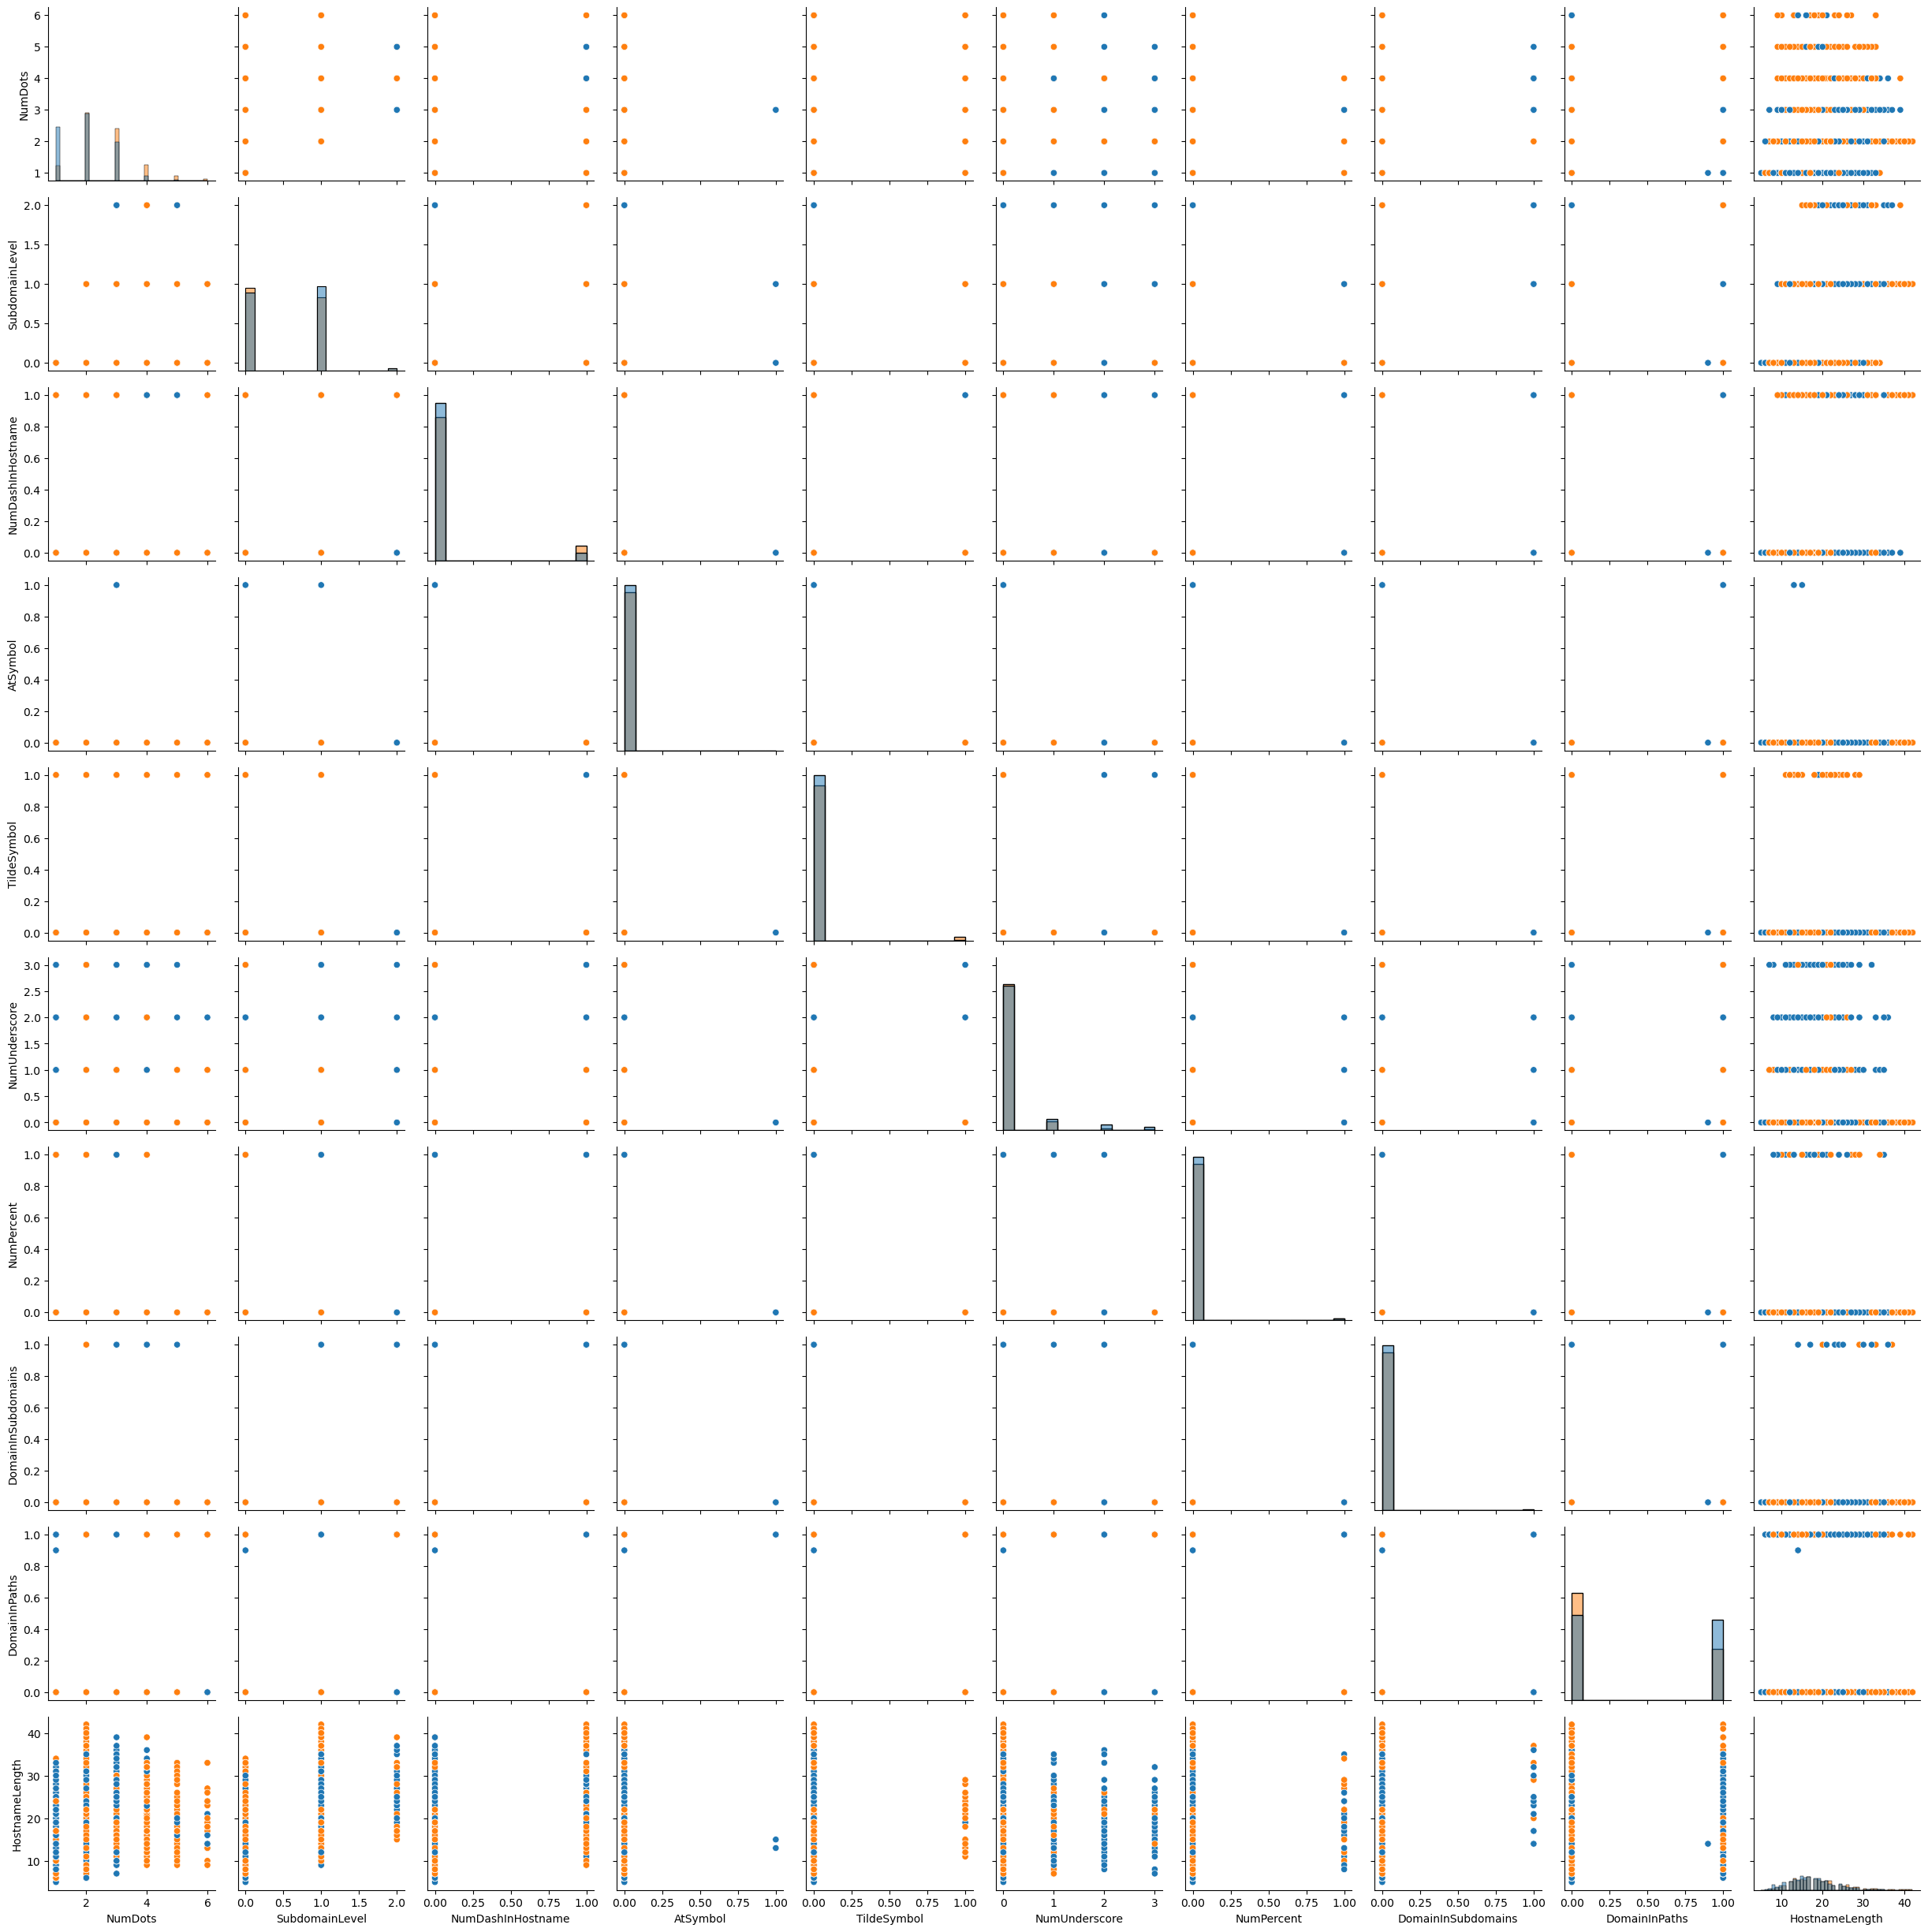

In [13]:
import seaborn as sns

# Define the columns in the "Domain" group
columns_to_plot_domain = ['CLASS_LABEL', 'NumDots', 'SubdomainLevel', 'NumDashInHostname', 'AtSymbol', 'TildeSymbol', 'NumUnderscore', 'NumPercent', 'DomainInSubdomains', 'DomainInPaths', 'HostnameLength']

# Create a PairGrid plot for the "Domain" group
g_domain = sns.PairGrid(df[columns_to_plot_domain], hue='CLASS_LABEL')
g_domain.map_diag(sns.histplot)
g_domain.map_offdiag(sns.scatterplot)

TildeSymbol, NumPercent, and DomaianInSubdomains, are highly correlated with each other, so we will only need to use one of them when deciding which feature to use.

### Path

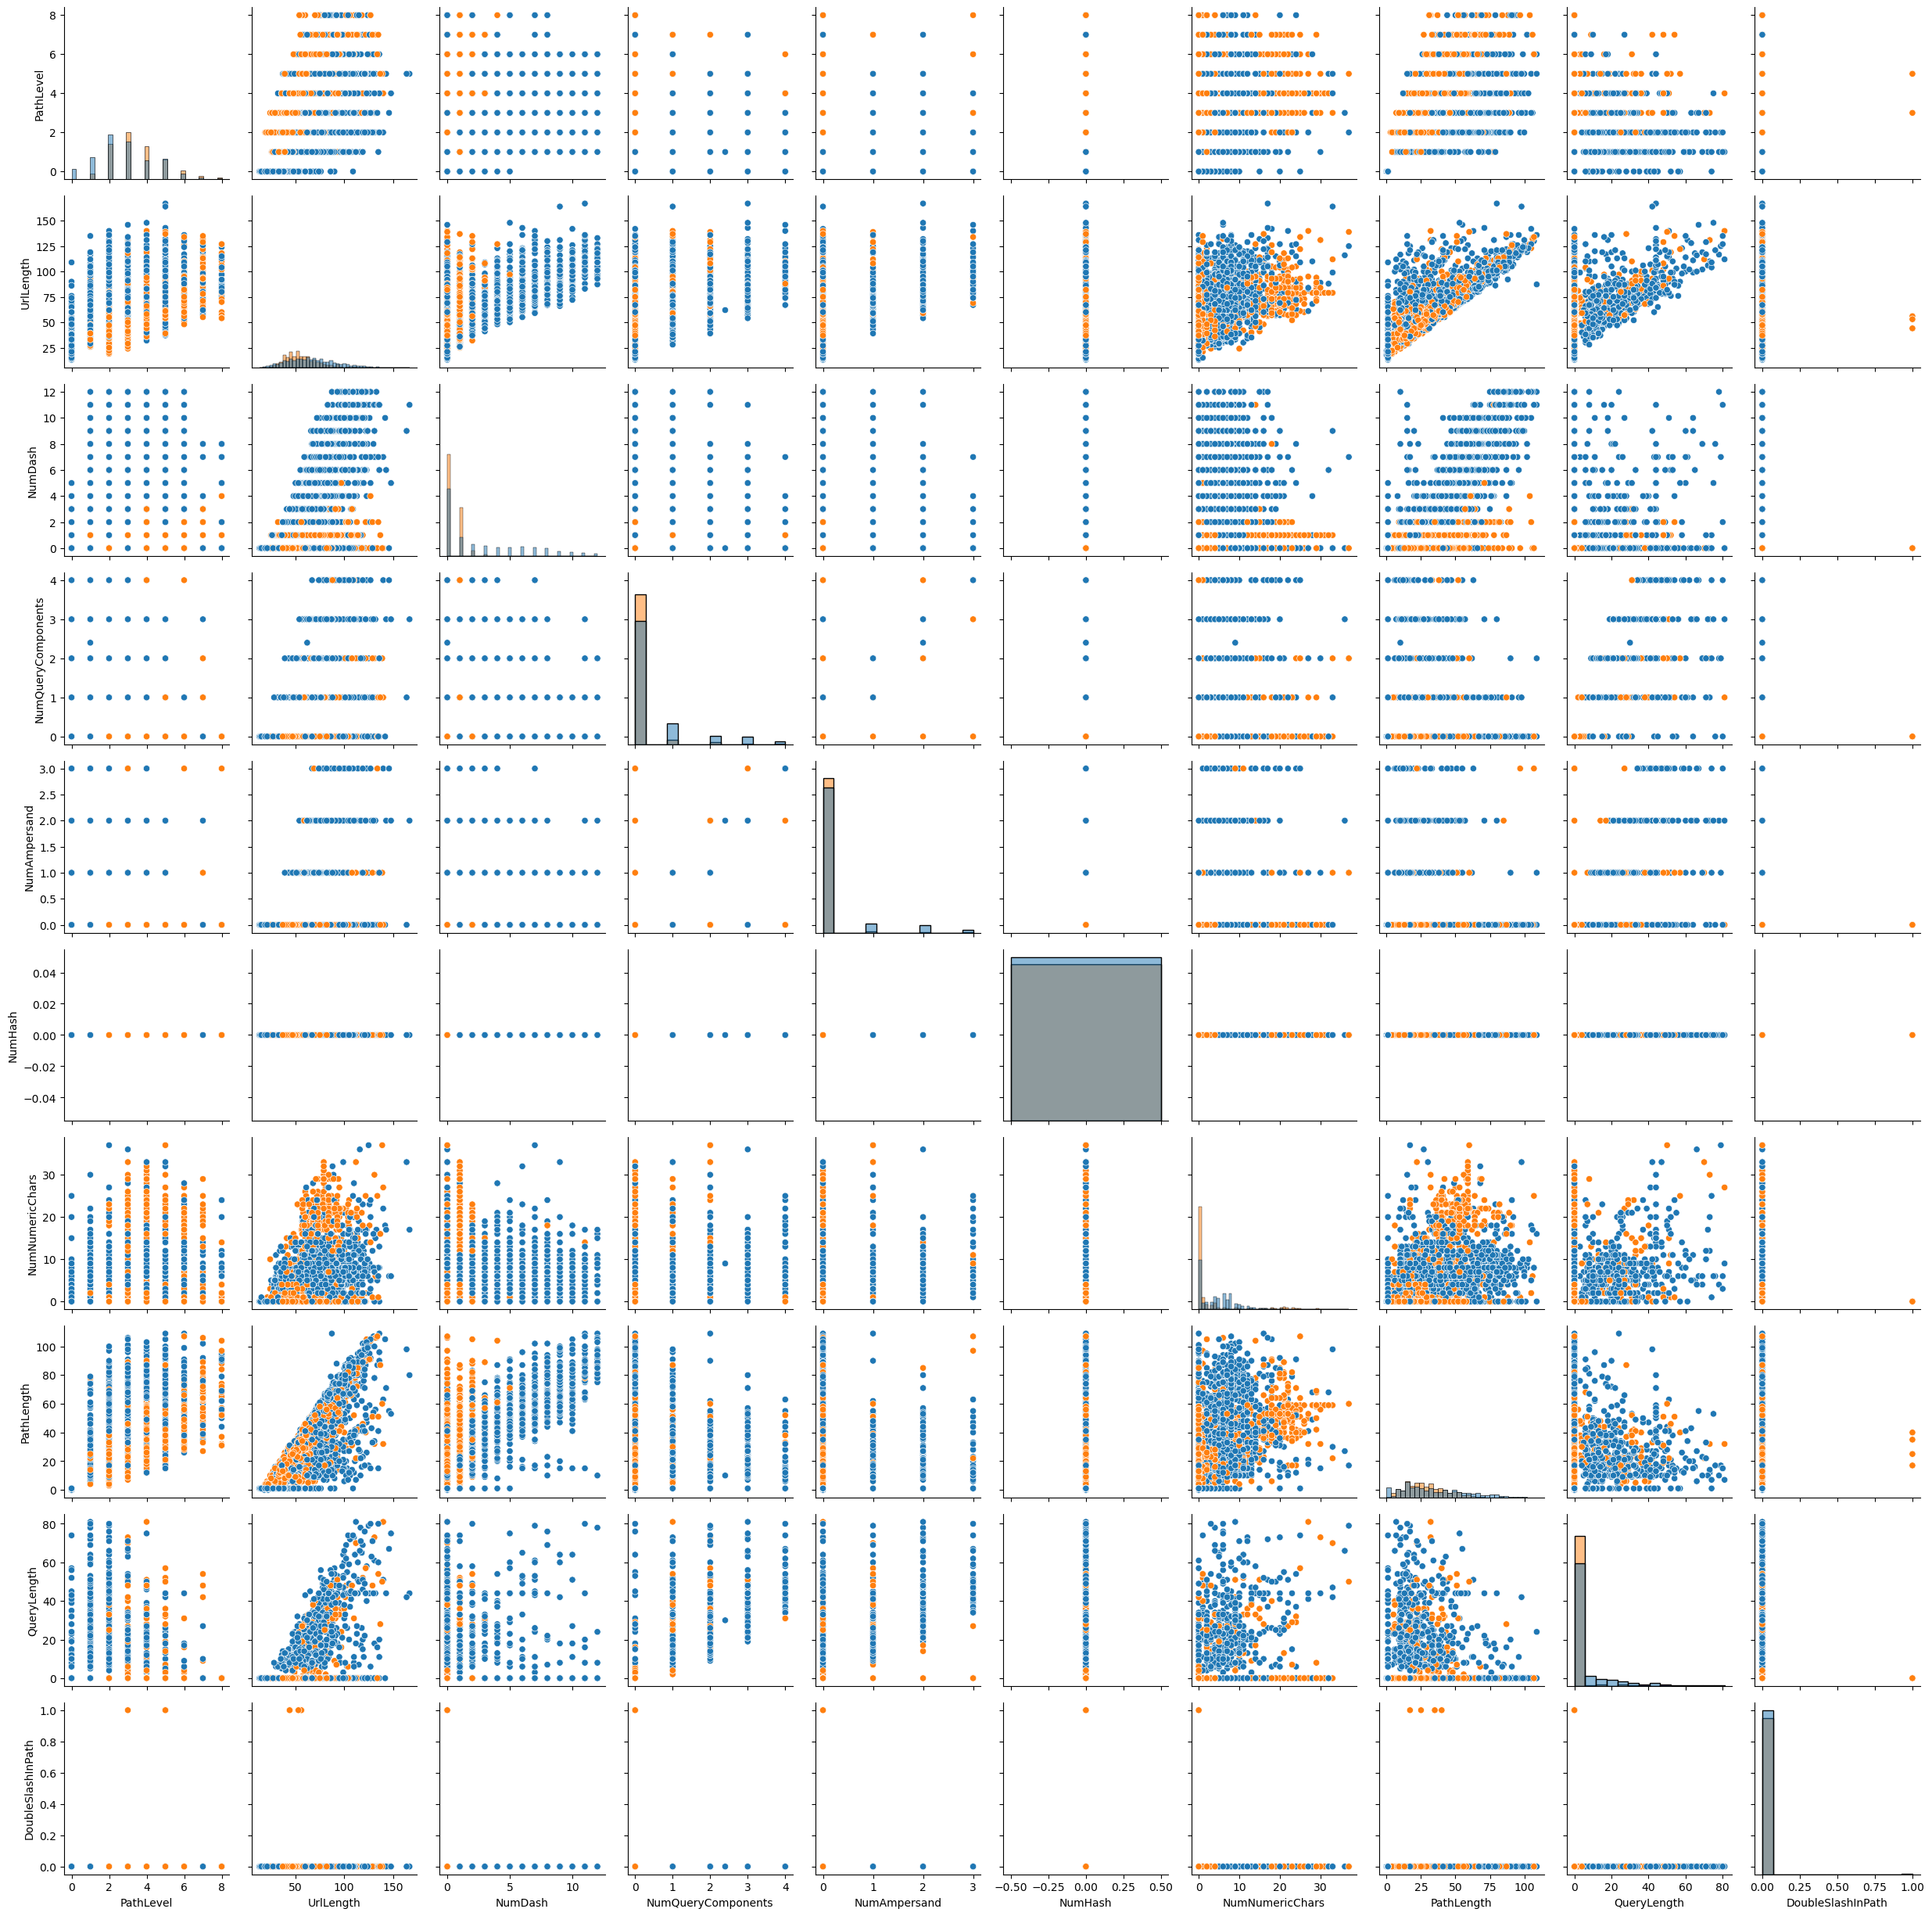

In [14]:
columns_to_plot_path = ['CLASS_LABEL', 'PathLevel', 'UrlLength', 'NumDash', 'NumQueryComponents', 'NumAmpersand', 'NumHash', 'NumNumericChars', 'PathLength', 'QueryLength', 'DoubleSlashInPath']

# Create a PairGrid plot for the "Path" group
g_path = sns.PairGrid(df[columns_to_plot_path], hue='CLASS_LABEL')
g_path.map_diag(sns.histplot)
g_path.map_offdiag(sns.scatterplot)

NumQueryComponents and NumAmpersand are highly correlated, so we will only need to use one of them when deciding which feature to use.

### URL

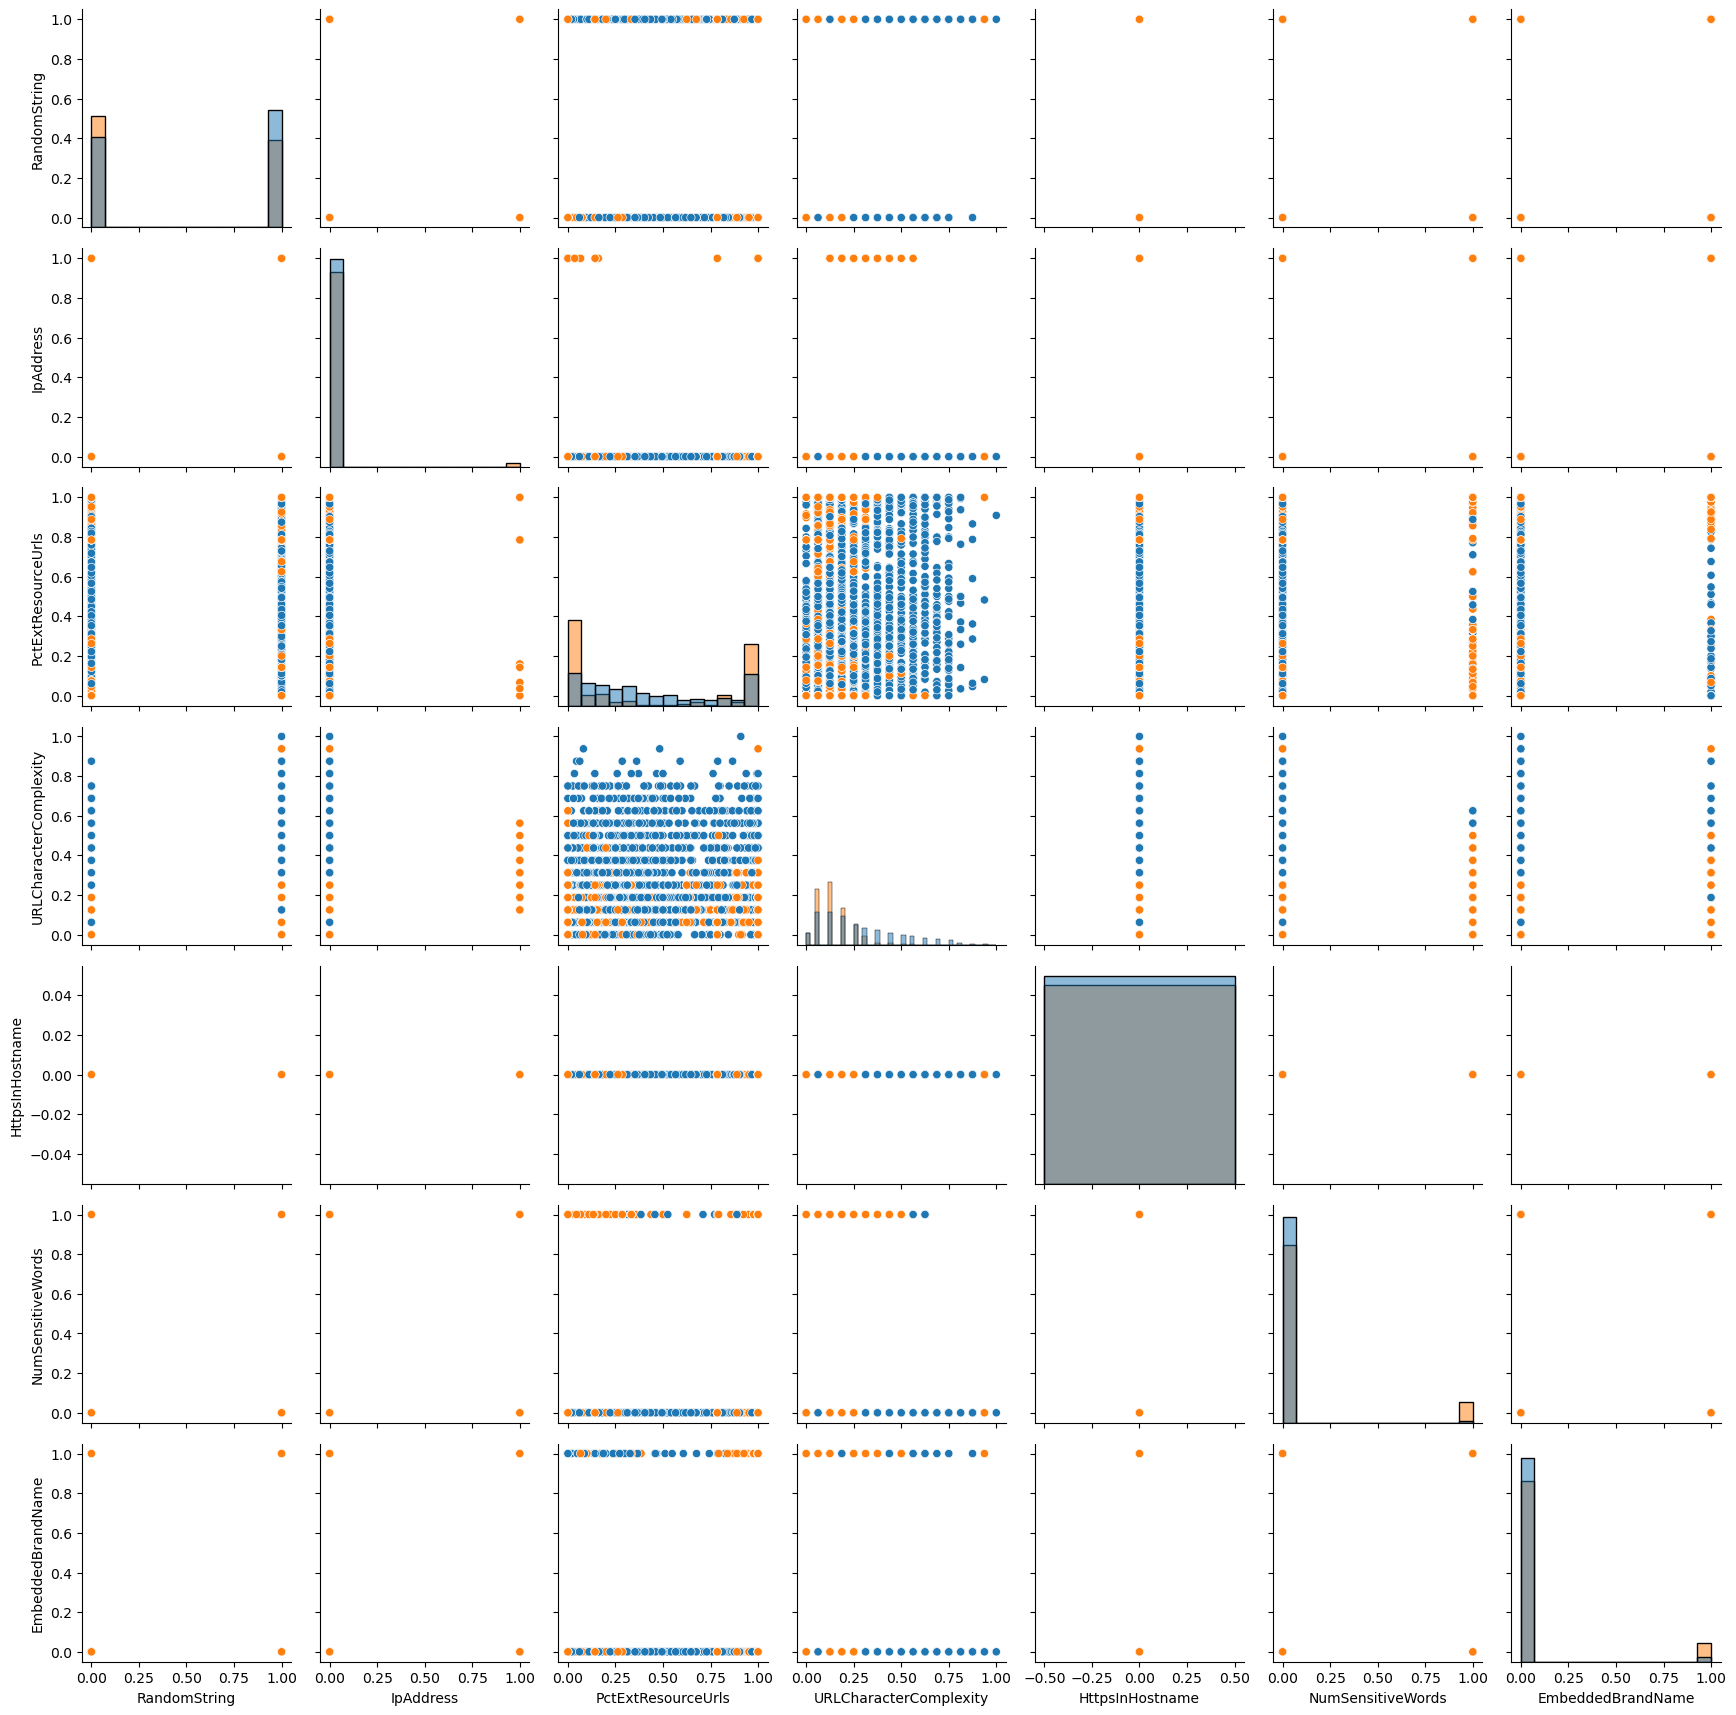

In [15]:
columns_to_plot_url = ['CLASS_LABEL', 'RandomString', 'IpAddress', 'PctExtResourceUrls', 'URLCharacterComplexity', 'HttpsInHostname', 'NumSensitiveWords', 'EmbeddedBrandName']

# Create a PairGrid plot for the "URL" group
g_url = sns.PairGrid(df[columns_to_plot_url], hue='CLASS_LABEL')
g_url.map_diag(sns.histplot)
g_url.map_offdiag(sns.scatterplot)

NumSensitiveWords and EmbeddedBrandName are highly correlated, so we will only need to use one of them when deciding which feature to use.

### Website

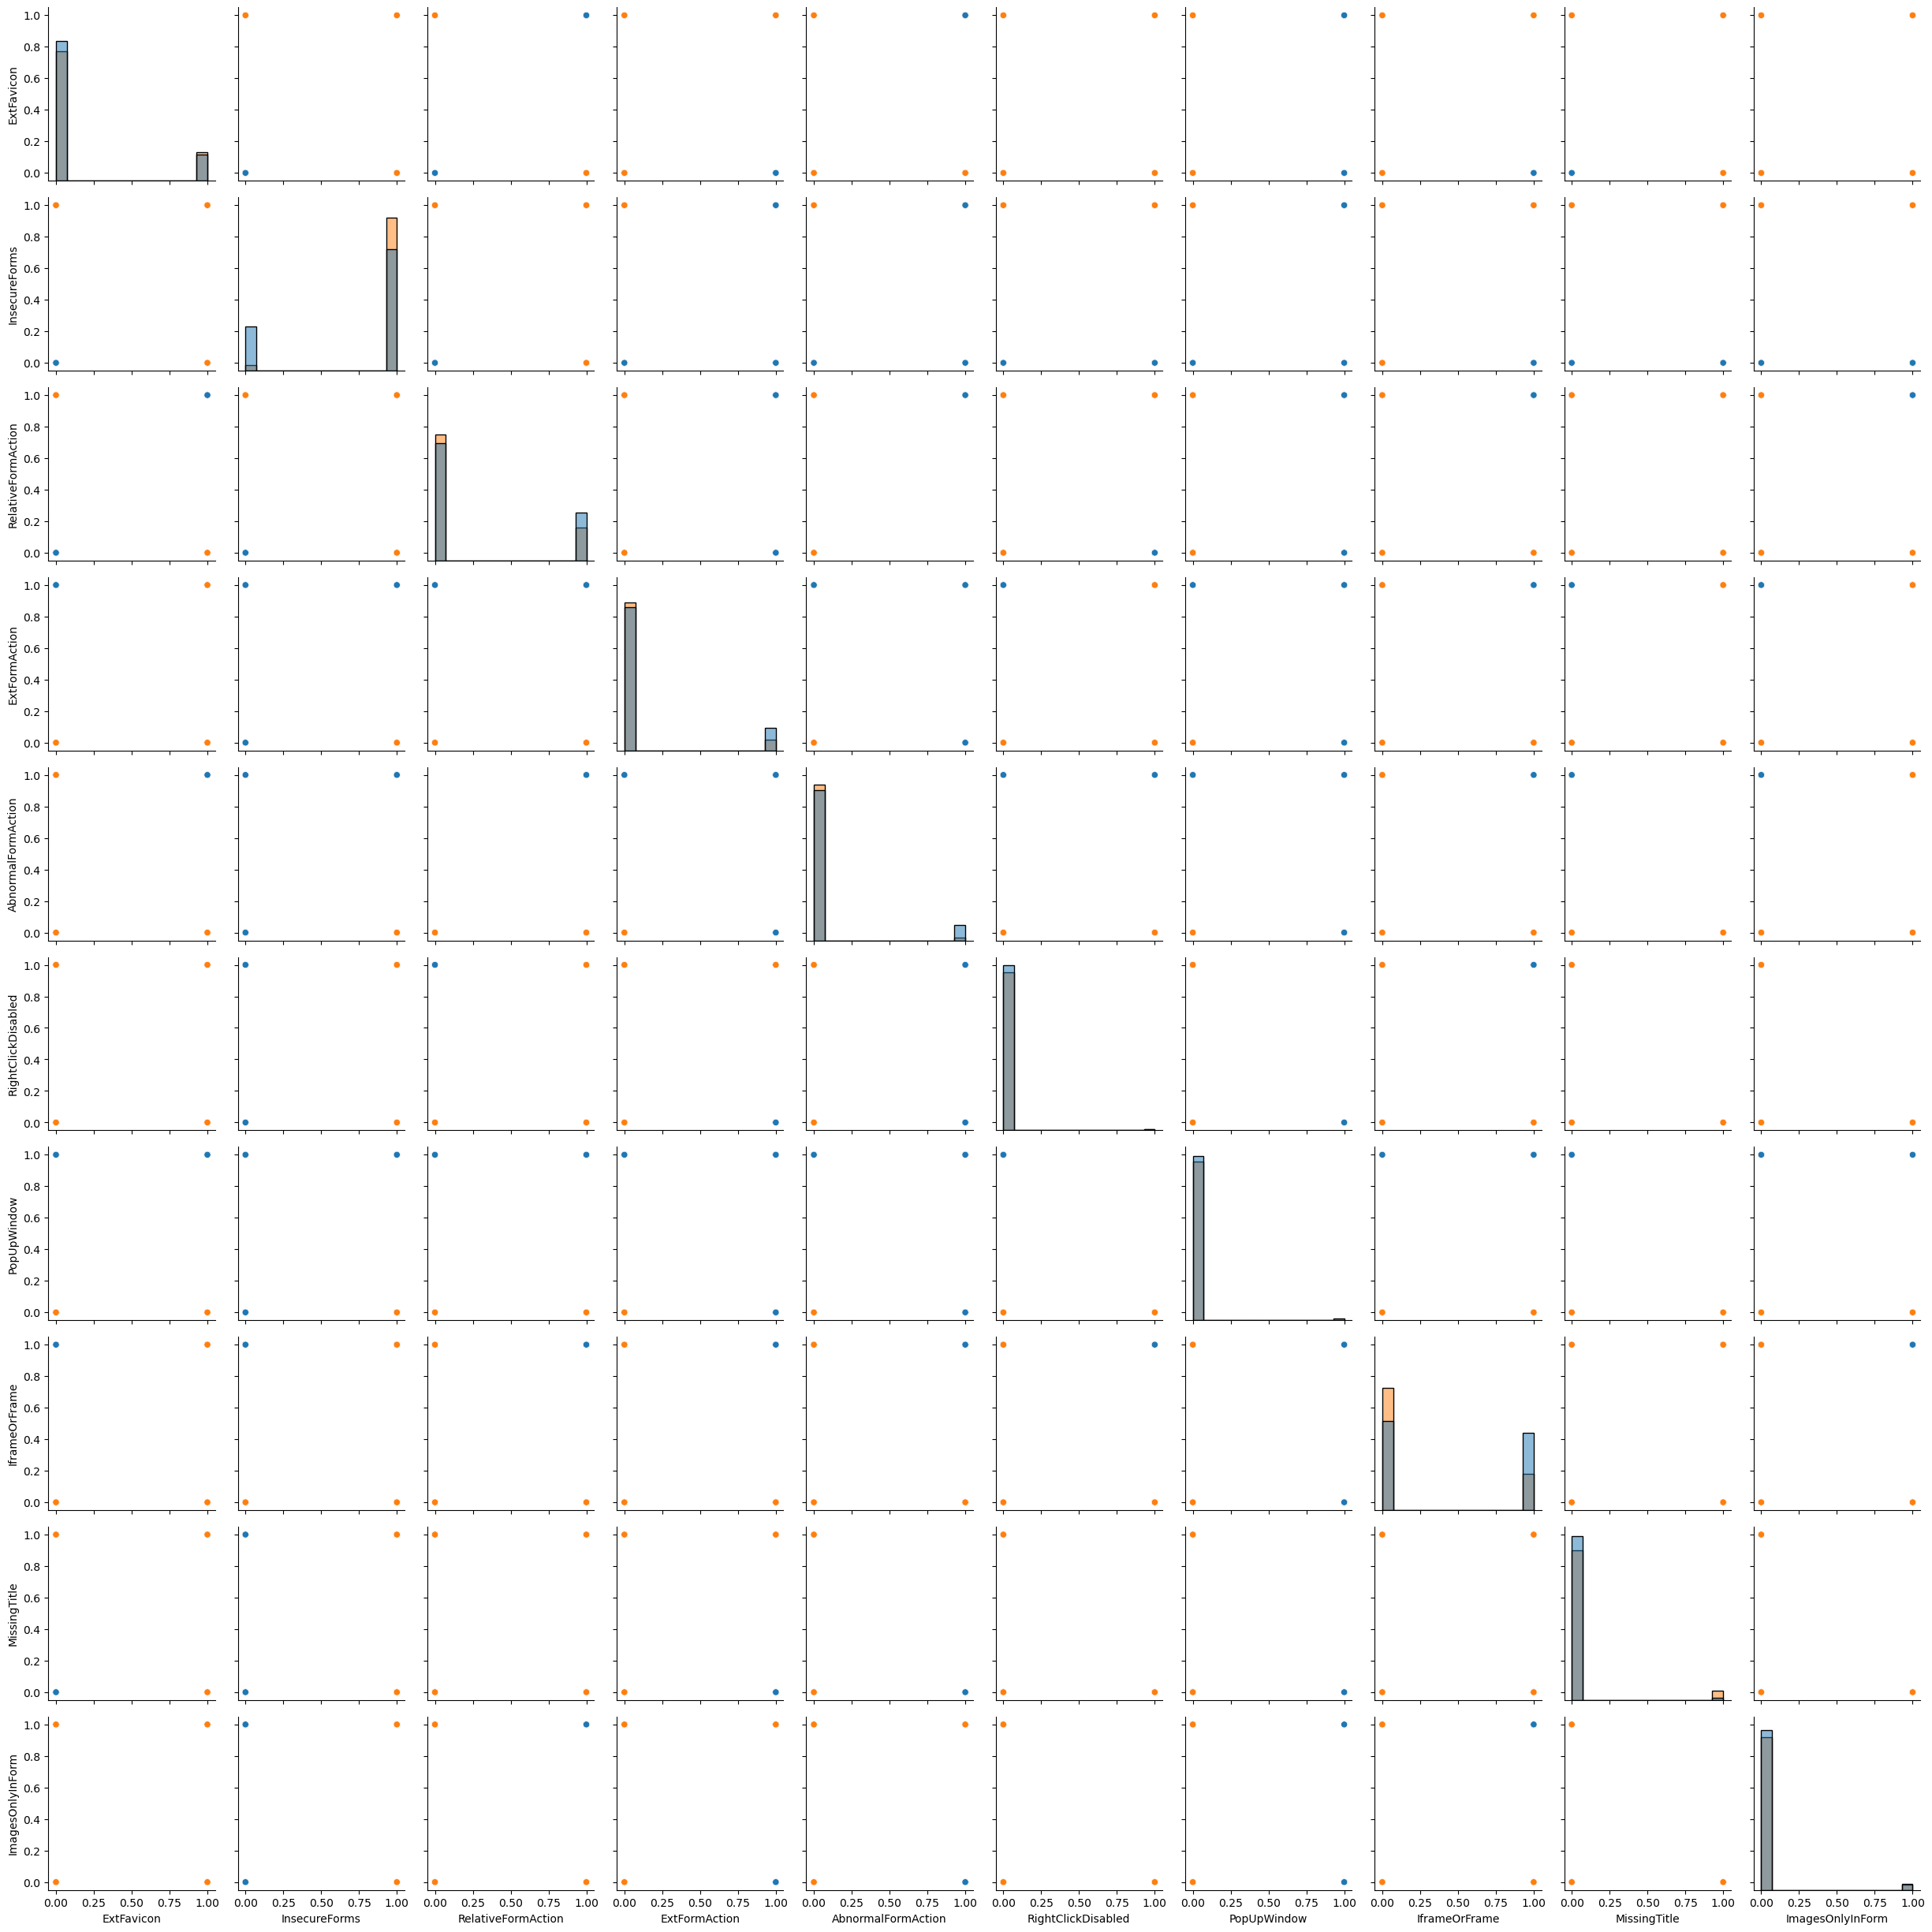

In [16]:
columns_to_plot_website = ['CLASS_LABEL', 'ExtFavicon', 'InsecureForms', 'RelativeFormAction', 'ExtFormAction', 'AbnormalFormAction', 'RightClickDisabled', 'PopUpWindow', 'IframeOrFrame', 'MissingTitle', 'ImagesOnlyInForm']

# Create a PairGrid plot for the "Website" group
g_website = sns.PairGrid(df[columns_to_plot_website], hue='CLASS_LABEL')
g_website.map_diag(sns.histplot)
g_website.map_offdiag(sns.scatterplot)

RightClickDisabled and ImagesOnlyInForm are highly correlated, so we will only need to use one of them when deciding which feature to use.

## Outliers

Similar to our work in Phase 1, it is important that we properly vet our dataset to remove any outliers. Outliers will negatively impact our model and subsequent predictions more than regular cases since it can skew the data in certain directions, causing us to have an inaccurate picture of how our model works. So, it's important to remove them before moving forward with the feature selection process.

First, a good way to start this process is to visualize the distribution of data throughout each feature/column. For illustrative purposes, we can print out a boxplot that showcases all of the columns we have in the groups before our outlier removal process, conduct the outlier removal process, then print out a new boxplot after to compare the plots for any potential removals. Boxplots are a good way to showcase outlier data points since they are easily plotted if they are outside of the whisker's range; thus, we will be utilizing them for this example.

With that said, let's import all of the necessary libraries:

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt

This allows us to now create a new box plot for all of the features we have in our groups:

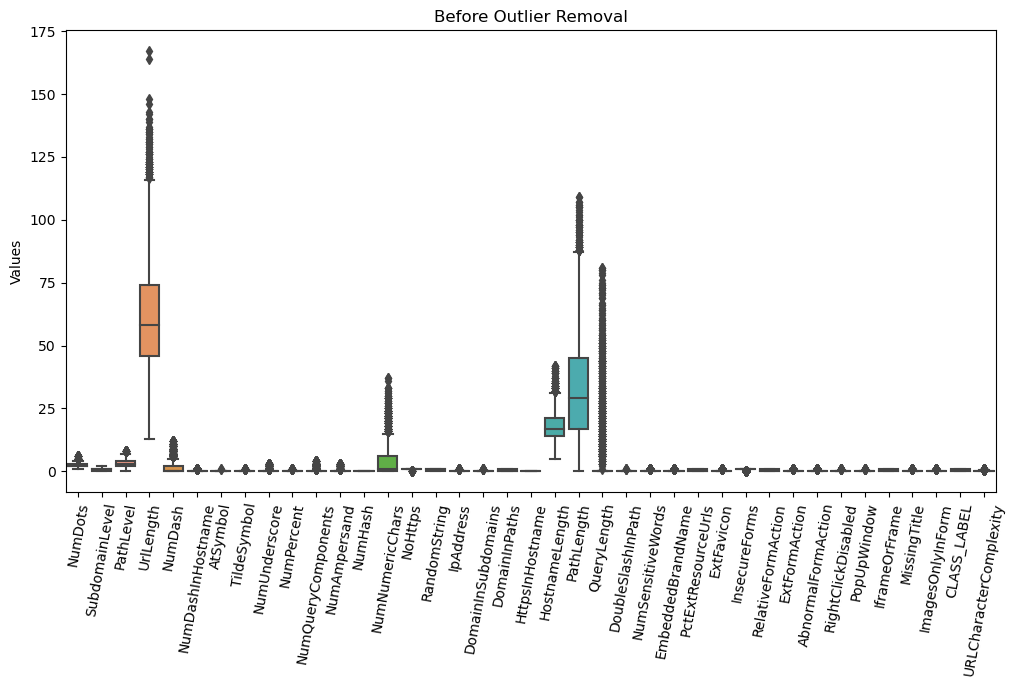

In [18]:
import seaborn as sns
import matplotlib.pyplot as plt

all_columns = df.columns.tolist()

plt.figure(figsize=(12, 6))  # Adjust the figure size as needed
sns.boxplot(data=df[all_columns])
plt.title('Before Outlier Removal')
plt.ylabel('Values')
plt.xticks(rotation=80)
plt.show()

We can see that a majority of the columns do have one or more outliers, with HostnameLength having a much larger amount of outliers compared to its peers.

Now that we have this plot, we need to find a way to remove any applicable data points. For our case, we can utilize the LocalOutlierFactor function. This function will help us identify and label potential outliers by evaluating the local density deviation of each data point with respect to its neighbors. The local outlier factor (LOF) is calculated, and data points that have significally higher LOF values can be considered as outliers in the data set.

First, let's import LocalOutlierFactor into our notebook:

In [19]:
from sklearn.neighbors import LocalOutlierFactor
# Define all columns
all_columns = df.columns.tolist()

# Create a LocalOutlierFactor model for all columns
clf_all = LocalOutlierFactor(n_neighbors=20)

Great! With that, we can find the label of all of the outlier values:

[-1.09106449 -1.12792178 -0.98483765 ... -1.22119601 -1.02178058
 -1.06208427]
[1 1 1 ... 1 1 1]


<Axes: >

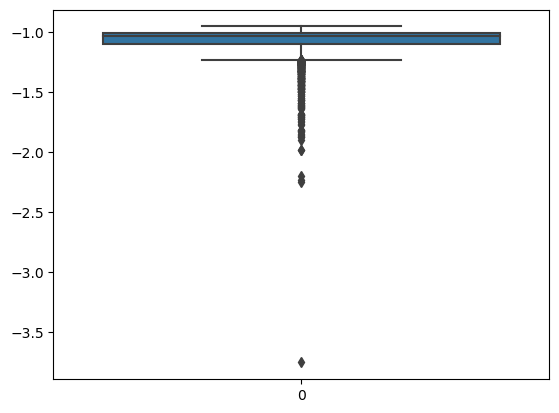

In [20]:
# Find the label of outliers for all columns
outlier_label_all = clf_all.fit_predict(df[all_columns].to_numpy())
print(clf_all.negative_outlier_factor_)
print(outlier_label_all)

# Print out a visual boxplot of the negative outlier factor
sns.boxplot(clf_all.negative_outlier_factor_)

Finally, we need to delete all of the outliers that we found; that is, all of the data points that have a negative outlier factor. We can do this by writing the following:

In [21]:
df = df.loc[outlier_label_all != -1]

Let's now print out the plot from earlier after we've run the outlier removal process:

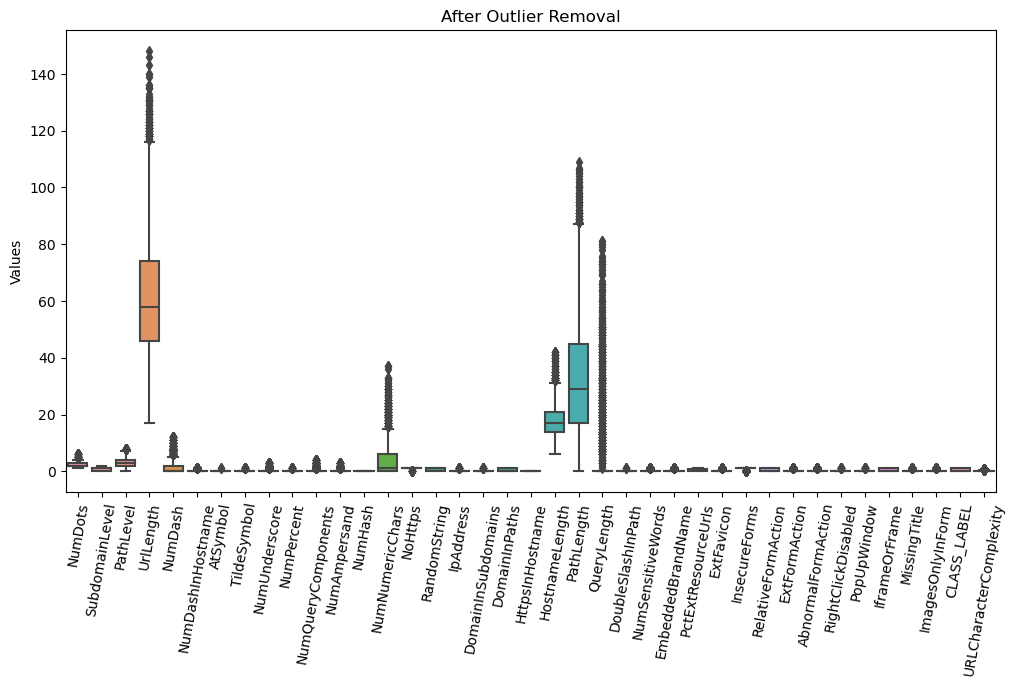

In [22]:
plt.figure(figsize=(12, 6))  # Adjust the figure size as needed
sns.boxplot(data=df[all_columns])
plt.title('After Outlier Removal')
plt.ylabel('Values')
plt.xticks(rotation=80)  # Rotate x-axis labels for better visibility
plt.show()

After generating the two plots, we can see that both plots are the same, meaning that the extreme cases visualized on them were not identified as outliers. The reasoning for this could be found in different areas, but a point to consider is that the parameter settings of the LocalOutlierFunction algorithm. It considers the local density of the data points. Since we have our n_neighbors parameter set to "20", it could be argued that this value is too low for the detection of outlier. 

## Feature Selection

Finally, we can move onto the feature selection section of this phase. After we conducted our visual analysis and removed any outliers, we can now have confidence to run a recursive feature elimination algorithm that will provide us with the best subset of features.

First, let's import the necessary libraries:

In [23]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

Now, we will conduct our RFE analysis group-by-group, in order for us to get the "best of the best" features as our final 7.

Let's start with the "Domain" group.

As mentioned previously, TildeSymbol, NumPercent, and DomaianInSubdomains are highly correlated, so we only need to include one of these features in the selection. Let's remove NumPercent and DomaianInSubdomains and keep the remaining features within this group:

In [24]:
columns_to_plot_domain = ['NumDots', 'SubdomainLevel', 'NumDashInHostname', 'AtSymbol', 'TildeSymbol', 'NumUnderscore', 'DomainInPaths', 'HostnameLength']

rfe_selector = RFE(estimator=LogisticRegression(max_iter=110), n_features_to_select = 3, step = 1)
rfe_selector.fit(df[columns_to_plot_domain], df['CLASS_LABEL'])
print(rfe_selector.get_support())
df[columns_to_plot_domain].columns[ rfe_selector.get_support() ]


[ True  True False False  True False False False]


Index(['NumDots', 'SubdomainLevel', 'TildeSymbol'], dtype='object')

Next is the "Path" group. Next up is the "Path" group. NumQueryComponents and NumAmpersand were identified as highly correlated, so lets remove NumAmpersand from our selection.

In [25]:
columns_to_plot_path = ['PathLevel', 'UrlLength', 'NumDash', 'NumQueryComponents', 'NumHash', 'NumNumericChars', 'PathLength', 'QueryLength', 'DoubleSlashInPath']

rfe_selector = RFE(estimator=LogisticRegression(max_iter=1000),n_features_to_select=3, step=1)
rfe_selector.fit(df[columns_to_plot_path], df['CLASS_LABEL'])
print(rfe_selector.get_support())
df[columns_to_plot_path].columns[ rfe_selector.get_support() ]

[ True False  True  True False False False False False]


Index(['PathLevel', 'NumDash', 'NumQueryComponents'], dtype='object')

Now, we have the "URL" group. NumSensitiveWords and EmbeddedBrandName were identified as highly vorrelated, so we can remove EmbeddedBrandName from the selection.

In [26]:
columns_to_plot_url = ['RandomString', 'IpAddress', 'PctExtResourceUrls', 'URLCharacterComplexity', 'HttpsInHostname', 'NumSensitiveWords']

rfe_selector = RFE(estimator=LogisticRegression(max_iter=1000),n_features_to_select = 3, step = 1)
rfe_selector.fit(df[columns_to_plot_url], df['CLASS_LABEL'])
print(rfe_selector.get_support())
df[columns_to_plot_url].columns[ rfe_selector.get_support() ]

[False  True False  True False  True]


Index(['IpAddress', 'URLCharacterComplexity', 'NumSensitiveWords'], dtype='object')

Finally, we have the "Website" group. RightClickDisabled and ImagesOnlyInForm are highly correlated, so we can drop ImagesOnlyInForm from our selection, and keep the rest.

In [27]:
columns_to_plot_website = ['ExtFavicon', 'InsecureForms', 'RelativeFormAction', 'ExtFormAction', 'AbnormalFormAction', 'RightClickDisabled', 'PopUpWindow', 'IframeOrFrame', 'MissingTitle', 'ImagesOnlyInForm']

rfe_selector = RFE(estimator=LogisticRegression(),n_features_to_select = 3, step = 1)
rfe_selector.fit(df[columns_to_plot_website], df['CLASS_LABEL'])
print(rfe_selector.get_support())
df[columns_to_plot_website].columns[ rfe_selector.get_support() ]

[False  True False False False False  True False  True False]


Index(['InsecureForms', 'PopUpWindow', 'MissingTitle'], dtype='object')

The recursive feature elimination has eliminated a majority of the features, and has left us with the following 12 features:
 - NumDots
 - SubdomainLevel
 - TildeSymbol
 - PathLevel
 - NumDash
 - NumQueryComponents
 - IpAddress
 - URLCharacterComplexity
 - NumSensitiveWords
 - InsecureForms
 - PopUpWindow
 - MissingTitle


NumDots and NumDash have both been normalized into URLCharacterComplexity, so we can remove NumDots and NumDash in favor of URLCharacterComplexity; leaving us with 10 features:
 - ~~NumDots~~
 - SubdomainLevel
 - TildeSymbol
 - PathLevel
 - ~~NumDash~~
 - NumQueryComponents
 - IpAddress
 - URLCharacterComplexity
 - NumSensitiveWords
 - InsecureForms
 - PopUpWindow
 - MissingTitle


When determining if a website is phishing or not, all of these features can be used to assess its legitimacy. However, we will only be using seven of these features with our machine learning model, so we will have to manually eliminate three of them. 

While the significance of specific features may vary depending on the context, there are some general attibutes that can apply to a wide set of phising websites.

After much research and deliberation, we have decided to remove the following features:


1. **TildeSymbol**:
   The presence of the tilde (~) symbol in a URL is not necessarily a strong indicator of phishing on its own. While some phishing URLs may contain unusual characters, there are many legitimate websites that use the tilde symbol in their URLs. Its significance as an indicator of phishing is relatively low.

2. **PopUpWindow**:
   The presence of pop-up windows can be a nuisance but is not a reliable indicator of phishing. Many legitimate websites use pop-up windows for various purposes, including displaying notifications, login forms, and advertisements. Pop-up windows alone are not a strong distinguishing factor for phishing.

3. **MissingTitle**:
   While missing or poorly formatted titles in web pages may indicate lower quality or less professional websites, they are not strong indicators of phishing by themselves. Legitimate websites may also have missing or poorly formatted titles, and the absence of a proper title does not necessarily imply malicious intent.

Now that we have the best features according to the RFE, we now have enough information to make a decision on the best 7 features for our model. The 7 features we will be using for our model are:

Determining the most impactful features for detecting phishing websites can be a complex task, and their importance may vary depending on the specific machine learning model and dataset used. However, I can provide some guidance on which features are commonly considered important for such classification tasks based on general knowledge.

1. **SubdomainLevel**:
   This feature may be relevant as phishing websites often use many subdomains to mimic legitimate domains.

2. **PathLevel**:
   The depth of the URL path can be indicative of phishing attempts, as malicious websites may use long and complex paths to deceive users or include certain parametors to tailor a URL to specific victim.

3. **NumQueryComponents**:
   The number of query components can be a useful feature, as phishing URLs may have multiple query parameters, especially if the goal of the attacker is to remotely execute code on the vivtim's system using Cross-Site Scripting (XSS), or Cross-Site Request Forgery (CSRF).

4. **IpAddress**:
   Phishing websites may sometimes use IP addresses in the URL instead of domain names to avoid detection systems that use domain names to block phishing websites.

5. **URLCharacterComplexity**:
   High character complexity in the URL can be a sign of obfuscation techniques used by phishing websites.

6. **NumSensitiveWords**:
   The presence of sensitive words in the URL or content can be a strong indicator of a phishing attempt. (Words such as “secure”, “account”, “webscr”, “login”)

7. **InsecureForms**:
   Phishing websites often use insecure forms to collect sensitive information; legitamte websites will typicall use HTTPS for secure data transmission, so this feature can be significant.

# Project Phase IV - Exploratory Data Analysis & Feature Selection using Decision Trees

We've now succesfully chosen our seven features. With that complete, we will now leverage/train a decision tree in order for us to choose the most influential of our chosen features in determining our target.

Decision trees are really helpful for our usecase for a couple of reasons. First, they provide us with an inherent ranking system that allows our to more effectively discern which features are the most influential. The concept is that features that lead to more effective splits can be considered more important than others. This ties into a general theme with decision trees, which is their interpretability and visualization prowess, allowing us as analysts to more efficently understand insights from the data.

## Feature Selection Recap

As stated at the end of the previous phase, we have a list of 7 features that we believe are the best for our model. These are:

1. **SubdomainLevel**

2. **PathLevel**

3. **NumQueryComponents**

4. **IpAddress**

5. **URLCharacterComplexity**

6. **NumSensitiveWords**

7. **InsecureForms**

This provides us with the basis to create a decision tree. This model will provide us with the ability to quantify how important each feature is to our model. There are a few things to consider in our creation process:


## Decision Tree Creation

To confirm our feature selection, we will train a decision tree using all 37 features in our data frame, and print out the importance value that is calculated for each feature. The highter the importance value for a feature is, the more influence the feature has on a prediction.

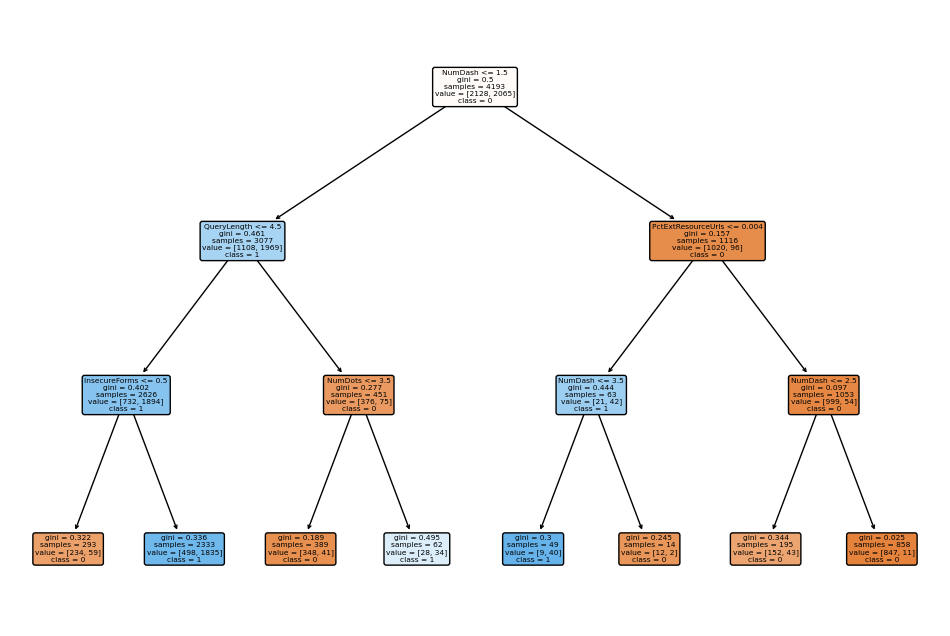

Most Influential Features:
      Feature  Importance
      NumDash    0.522199
  QueryLength    0.235321
InsecureForms    0.176957


In [28]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

target_column = "CLASS_LABEL"

# Separate features (X) and target variable (y)
X = df.drop(target_column, axis=1)
y = df[target_column]

# Create a Decision Tree classifier
clf = DecisionTreeClassifier(random_state=0, max_depth=3)

# Fit the classifier
clf.fit(X, y) 

# Visualize the decision tree
classes = clf.classes_.tolist()
str_classes = [str(item) for item in classes]
plt.figure(figsize=(12, 8))
tree.plot_tree(clf, filled=True, feature_names=X.columns.to_list(), class_names=str_classes, rounded=True)
plt.show()

# Create a DataFrame to display feature importances
feature_importances = clf.feature_importances_
feature_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Display the most influential features
print("Most Influential Features:")
print(feature_importance_df.head(3).to_string(index=False))


### Influential Features

By doing some research, we found that **sklearn.tree.DecisionTreeClassifier()** has an attribute called "feature_importances_". This attribute ranks all of the features in terms of importance.

1. Most influential feature: **NumDash**

    *Importance: 0.52*
    
    This feature had the highest level of importance. This could be due to a common tactic used by threat actors called typesquatting. Phishers often use variations of popular domain names with additional characters like dashes to exploit typing mistakes. Users who accidentally mistype a URL might be directed to a phishing site.
    
    This could also be a result of obfuscating being a common tactic used by attackers. Phishers may use a large number of dashes to make the URL look confusing and hide their malicious intent. They might try to create URLs that resemble legitimate ones but have slight variations, making it more challenging for users to spot the difference.

2. Second most influential feature: **QueryLength**
    
    *Importance: 0.24*
    
    Again, we believe this could be due to obfuscation being such an effective method for attackers. Phishers may use long and complex URLs to obfuscate the actual destination of a link. Users might be less likely to scrutinize lengthy URLs, making it easier for attackers to hide malicious domains.
    
3. Third most influential feature: **InsecureForms**
    
    *Importance: 0.18*
    
    If the communication between the user's browser and the server is not encrypted (using HTTPS), the information submitted through the form can be intercepted by third parties. Phishing attackers could exploit this vulnerability to capture sensitive information such as login credentials, personal details, or financial information.
    
    Additionally, Insecure forms are susceptible to cross-site scripting attacks, where attackers inject malicious scripts into the webpage. These scripts can then steal information entered into the form, compromise user sessions, or redirect users to malicious websites. XSS vulnerabilities can be exploited by phishing attackers to enhance the effectiveness of their campaigns.

After running our decision tree, we decided to still stick with the 7 features we originally chose from the previous phase, as many of the features that we have chosen are present in both the feature_importances_ output and we believe are highly relevant to our model.

### Increase Confidence

There are a couple ways that we could theoretically increase confidence in our answers from the decision tree. One way would be to cross-validate our dataset. Cross-validation is the action of splitting up a dataset into multiple, smaller subsets. We then train the model on these subsets and evaluate its performances.

For example, we can do the following:

In [29]:
from sklearn.model_selection import cross_val_score

# Separate features (X) and target variable (y)
X = df.drop(target_column, axis=1)
y = df[target_column]

# Create a Decision Tree classifier
clf = DecisionTreeClassifier(random_state=0, max_depth=3)

# Perform 5-fold cross-validation
cross_val_scores = cross_val_score(clf, X, y, cv=5, scoring='accuracy')

# Display cross-validation scores
print("Cross-Validation Scores:", cross_val_scores)
print("Mean Cross-Validation Score:", cross_val_scores.mean())


Cross-Validation Scores: [0.84147795 0.82479142 0.83790226 0.8150358  0.8353222 ]
Mean Cross-Validation Score: 0.8309059256246071


This provides us with a mean cross-validation score, which is a performance metrics that gives us an approximate estimation of how well our model is performing on our dataset. For reference, a higher score (closer to 1.0) indicates better generalization performance and increased reliability of the model across those different subsets of the dataset.

There are other ways we could increase confidence. First, we can tune the parameters within the decision tree itself. This includes parameters like *max_depth*, *min_samples_split*, and *min_samples_leaf*. We could iterate through different versions in order to find the optimal configuration/balance between each parameter that would yield us the highest confidence possible.

Finally, another way we can visualize the decision tree's performance is by something like a confusion matrix. We leveraged a confusion matrix earlier in the project, but as a refresher, it is essentially a table that provides us with summarizations of the results by comparing predicted labels of a model with the actual labels from the dataset. Below is an example of a confusion matrix for our use-case:

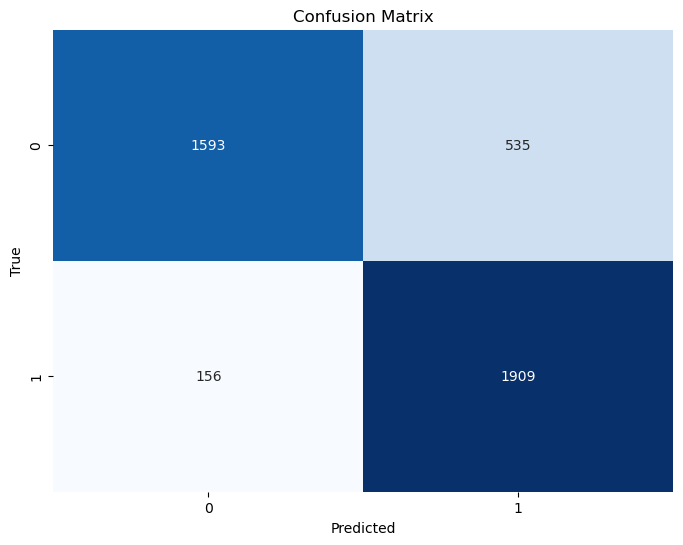

Accuracy: 0.8352
Precision: 0.7811
Recall: 0.9245
F1 Score: 0.8468


In [30]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Separate features (X) and target variable (y)
X = df.drop(target_column, axis=1)
y_true = df[target_column]

# Create a Decision Tree classifier
clf = DecisionTreeClassifier(random_state=0, max_depth=3)
clf.fit(X, y_true)  # Make sure to fit the model before predicting

# Predict using the trained decision tree model
y_pred = clf.predict(X)

# Create a confusion matrix
cm = confusion_matrix(y_true, y_pred)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=clf.classes_, yticklabels=clf.classes_)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# Calculate accuracy
accuracy = accuracy_score(y_true, y_pred)

# Calculate precision
precision = precision_score(y_true, y_pred)

# Calculate recall
recall = recall_score(y_true, y_pred)

# Calculate F1 score
f1 = f1_score(y_true, y_pred)

print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")

We can see that we have a low number of false negatives (bottom left quadrant) and false positives (top right quadrant) by looking at just the labels as well as the statistical metrics below that. In our context, a false negative would be a phishing website incorrectly identified as a legitimate website, while a false positive is a legitimate website incorrectly identified as a phishing website. The former can be argued to be more damaging, so it's a good sign that we had a relatively small amount of false negatives. This piece of evidence helps build our confidence in the model's performance.

### Decision Tree Confirmation

Fundamentally, the results provided from our decision tree model do align with what we thought going into this phase, considering what our results were in the previous phase. *NumDash* is a critically important feature within our dataset. As mentioned previously, type squatting is a method commonly leveraged by malicious actors. However, there are some other prominent methods that can be highlighted from *NumDash*. For example, many of these malicious URLs with use dynamic URL structures; that is, URL structures that will change over time in order to evade detection. The presence of dashes in different positions in the URL could alert our model of attempts to create these dynamic, unpredictable patterns. *NumDash* is also heavily tied to phishing, as phishing attacks come in various forms. Some of thse forms involve the creation of URLs with a subtle number of changes, such as the insertion of dashes. *NumDash* can serve as a potentialyl valuable indicator in identifying these variations. One could argue that the difference between *NumDash* and our #2, *QueryLength*, was a bit suprising, but we had a feeling considering what NumDash is that it would still be one of, if not the most, influential feature that we selected.

## Decision Tree Training

### Determining Best Value

Lets detirme the best parameters for our decision tree model. This will be the model we will use to predict the target class, so we want the model to have best possible parameters possible to maximize our model's perfomance.

In [31]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_auc_score
param_grid = {
    'max_depth': [None, 5, 10, 15, 20, 30, 40, 50],
    'min_samples_split': [2, 5, 10, 15, 20, 30, 40, 50]
}

# Create GridSearchCV
grid_search = GridSearchCV(clf, param_grid, scoring='roc_auc', cv=5, n_jobs=-1)

# Fit the grid search to the data
grid_search.fit(X, y)

# Get the best parameters
best_params = grid_search.best_params_
print("Best Parameters:", best_params)

# Get the best model
best_model = grid_search.best_estimator_

# Predict on the test set
y_pred = best_model.predict_proba(X)[:, 1]

# Calculate AUC on the test set
auc_score = roc_auc_score(y, y_pred)
print("AUC for best decsion tree model:", auc_score)

Best Parameters: {'max_depth': None, 'min_samples_split': 40}
AUC for best decsion tree model: 0.9890330016930946


Now we know the best values for our decision tree: 

**max_depth:** None

**min_samples_split:** 40

Next, we must collect the Recall, Precision, F1 scores for our best model.

In [32]:
from sklearn.metrics import classification_report

# Fit the model on the entire training set (if not done already)
best_model.fit(X, y)

# Predict on the test set
y_pred = best_model.predict(X)

# Print classification report
print("Classification Report:")
print(classification_report(y, y_pred))


Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.94      0.94      2128
           1       0.94      0.94      0.94      2065

    accuracy                           0.94      4193
   macro avg       0.94      0.94      0.94      4193
weighted avg       0.94      0.94      0.94      4193



We want the precision, recall, f1-score values to be as close to 1 as possible. While these values arn't exactly 1, they are close enough for this model to be considered a good model.

Additioanlly, we can calculate the best parameters for a Support Vector Machine (SVM) in case we want to use a different model in the future.

In [33]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn.metrics import roc_auc_score, auc

# Define the parameter grid for GridSearchCV
param_grid = {
    'C': [0.1, 1, 10, 100],
    'kernel': ['linear', 'rbf', 'poly', 'sigmoid']
}

# Create an SVM classifier
svm = SVC(probability=True, random_state=0)

# Use GridSearchCV to find the best parameters
grid_search = GridSearchCV(svm, param_grid, scoring='roc_auc', cv=5)
grid_search.fit(X, y)

# Get the best parameters
best_params = grid_search.best_params_
print("Best Parameters:", best_params)

# Evaluate the model with the best parameters on the test set
best_svm = grid_search.best_estimator_
y_pred_prob = best_svm.predict_proba(X)[:, 1]
roc_auc = roc_auc_score(y, y_pred_prob)

print("AUC for best SVM model:", roc_auc)

Next, we'll calculate some andditional information about our best SVM model

In [ ]:
from sklearn.metrics import classification_report

# Fit the model on the entire training set (if not done already)
best_svm.fit(X, y)

# Predict on the test set
y_pred = best_svm.predict(X)

# Print classification report
print("Classification Report:")
print(classification_report(y, y_pred))

Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.88      0.91      2128
           1       0.88      0.95      0.91      2065

    accuracy                           0.91      4193
   macro avg       0.91      0.91      0.91      4193
weighted avg       0.91      0.91      0.91      4193



While these precision, recall, f1-score values are slightly lower than our **DecisionTreeClassifier()** model, they are still fairly high. It may be worth it to test out a SVM model in the future.

Let's summarize our data:

**DecisionTreeClassifier**
| max_depth | min_samples_split | AUC | Recall | Precision | F1 |
| --- | --- | --- | --- | --- | --- |
| None | 40 | 0.989 | 0.94 | 0.94 | 0.94

**SVM**
| C | kernel | AUC | Recall | Precision | F1 |
| --- | --- | --- | --- | --- | --- |
| 100 | rbf | 0.966 | 0.91 | 0.91 | 0.91



### Training the Model

Next, let's visualize the effectivness for our best DecisionTreeClassifier model by plotting its ROC curve.

0.9890330016930946


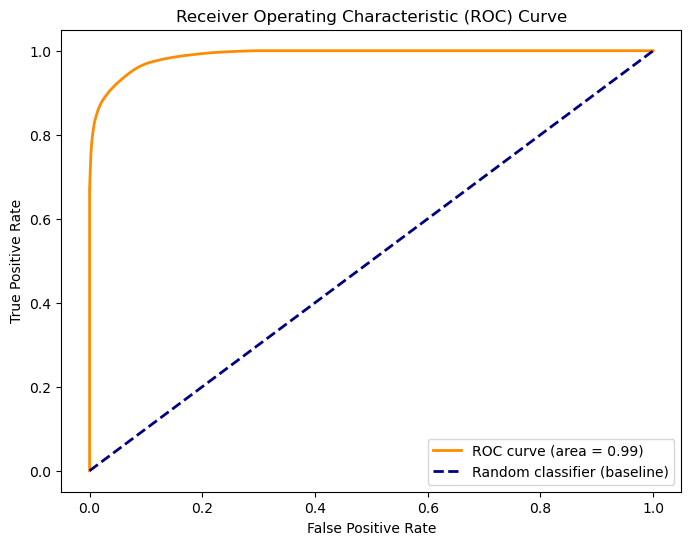

In [ ]:
from sklearn.metrics import roc_curve, auc

# This model was already been trained when we calculated the auc score. 
# All we have to do is predict the values to plot the ROC curve.

# Predict results
y_pred_prob = best_model.predict_proba(X)[:, 1]

# Plot ROC curve
fpr, tpr, thresholds = roc_curve(y, y_pred_prob)
roc_auc = auc(fpr, tpr)
print(roc_auc)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=2, label='Random classifier (baseline)', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()


The closer the ROC curve area is to 1, the better our model is. Since this model has an ROC curve area of 0.989, we can confidently say that it is a good model.

However, we have yet to split the model into testing and training dat yet. We will only be able to measure its true proficiency once we give the model new data that it hasn't seen before.

## Conclusion

We have confidence in saying that our predictive model's performance is quite high and we can have confidence in its abilities to help predict malicious websites. From a statistical perspective, it performs well. Our decision tree model's ROC curve area, which measures the model's ability to distinguish between malicious and non-malicious websites, achieved a remarkable 0.989 out of a potential 1.000.

We also conducted testing with an Support Vector Machine (SVM) model to check for potential alternative models. We found that it's Area Under the Curve (AUC) value was a 0.966/1.000, which fell below the decision tree's AUC of 0.989. As a result, we believe that the Decision Tree is our best model and should be the primary model moving foward.

Our next steps include us needing to properly split our data into testing and training subsets in order to properly measure its profiency on unfamiliar data. This results of this testing will give us a better insight on how it would perform on real-world, phishing website datasets.

# Project Phase V - Model Building and Prediction

In the previous phase, we used all of the columns in out data frame to train, and compare our models. 

After testing, we have decided to continue to use the seven features we previously chose:

1. SubdomainLevel
2. PathLevel
3. NumQueryComponents
4. IpAddress
5. URLCharacterComplexity
6. NumSensitiveWords
7. InsecureForms

## Model Building

### Preparing Our Data

First, let's separate our data.

We'll limit our training data frame to only the features listed above.

In [ ]:
X = df[["SubdomainLevel", "PathLevel", "NumQueryComponents", "IpAddress", "URLCharacterComplexity", "NumSensitiveWords", "InsecureForms"]]
X.head()

,SubdomainLevel,PathLevel,NumQueryComponents,IpAddress,URLCharacterComplexity,NumSensitiveWords,InsecureForms
id,,,,,,,
1,1.0,5.0,0.0,0.0,0.3125,0.0,1.0
2,0.0,5.0,0.0,0.0,0.3750,0.0,1.0
3,0.0,4.0,0.0,0.0,0.1875,0.0,1.0
4,1.0,6.0,0.0,0.0,0.1250,1.0,1.0
5,0.0,3.0,0.0,0.0,0.1250,1.0,1.0


Next, we'll separate our target variable from the rest of our data.

In [ ]:
y = df[["CLASS_LABEL"]]
y

,CLASS_LABEL
id,
1,0
2,1
3,1
4,1
5,1
...,...
4996,0
4997,0
4998,0


Next, we have to separate our data into testing and training data.

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Now that our data is properly separated, we can move onto comparing models to determine which is the best. 

### Comparing Models

We will be comparing the following models from the sklearn module:
 - DecisionTreeClassifier
 - RandomForestClassifier
 - SVM (Support Vector Machine)
 - MLPRegressor

#### DecisionTreeClassifier

In [ ]:
param_grid = {
    "criterion": ["gini", "entropy"],
    "max_depth": [None, 5, 10, 20, 30, 40, 50, 60],
    "min_samples_split": [10, 30, 50, 75, 100],
    "min_samples_leaf": [1, 2, 4],
}

# Create decision tree
clf = DecisionTreeClassifier(random_state=0)

# Create GridSearchCV
grid_search = GridSearchCV(clf, param_grid, scoring='roc_auc', cv=5, n_jobs=-1)
grid_search.fit(X_train, y_train)

# Get the best parameters
best_params = grid_search.best_params_
print("Best Parameters:", best_params)

# Get the best model
best_clf = grid_search.best_estimator_

# Predict
decison_tree_y_pred_prob = best_clf.predict_proba(X_test)[:, 1]

# Calculate AUC
decision_tree_auc = roc_auc_score(y_test, decison_tree_y_pred_prob)
print("AUC for best decsion tree model:", decision_tree_auc)

Best Parameters: {'criterion': 'gini', 'max_depth': None, 'min_samples_leaf': 4, 'min_samples_split': 10}
AUC for best decsion tree model: 0.8868015249800842


#### RandomForestClassifier

In [ ]:
from sklearn.ensemble import RandomForestClassifier

param_grid = {
    "n_estimators": [50, 100, 200],
    "max_depth": [None, 10, 20, 30],
    "min_samples_split": [2, 5, 10],
    "min_samples_leaf": [1, 2, 4],
    "bootstrap": [True, False]
}

# Create decision tree
rf_clf = RandomForestClassifier(random_state=0)

# Create GridSearchCV
grid_search = GridSearchCV(rf_clf,param_grid, scoring="roc_auc", cv=5, n_jobs=-1)
grid_search.fit(X_train, y_train.values.ravel())

# Get the best parameters
best_params = grid_search.best_params_
print("Best Parameters:", best_params)

# Get the best model
best_rf_clf = grid_search.best_estimator_

# Predict
random_forest_y_pred_prob = best_rf_clf.predict_proba(X_test)[:, 1]

# Calculate AUC
random_forest_auc = roc_auc_score(y_test, random_forest_y_pred_prob)
print("AUC for best Random Forest Classifier:", random_forest_auc)

NameError: name 'GridSearchCV' is not defined

#### SVM

In [ ]:
param_grid = {
    "C": [0.1, 1, 10, 100],
    "kernel": ["linear", "rbf", "poly", "sigmoid"]
}

# Create an SVM classifier
svm = SVC(probability=True, random_state=0)

# Use GridSearchCV to find the best parameters
grid_search = GridSearchCV(svm, param_grid, scoring="roc_auc", cv=5, n_jobs=-1)
grid_search.fit(X_train, y_train.values.ravel())

# Get the best parameters
best_params = grid_search.best_params_
print("Best Parameters:", best_params)

# Evaluate the model with the best parameters
best_svm = grid_search.best_estimator_

# Predict 
svm_y_pred_prob = best_svm.predict_proba(X_test)[:, 1]

# Calculate AUC
svm_roc_auc = roc_auc_score(y_test, svm_y_pred_prob)
print("AUC for best SVM model:", svm_roc_auc)

Best Parameters: {'C': 100, 'kernel': 'poly'}
AUC for best SVM model: 0.8709371799248891


#### MLPRegressor

In [ ]:
from sklearn.neural_network import MLPRegressor

param_grid = {
    "hidden_layer_sizes": [(50), (100), (50, 50), (100, 50, 25)],
    "activation": ["relu", "tanh", "logistic"],
    "solver": ["adam", "sgd"],
    "alpha": [0.0001, 0.001, 0.01],
    "learning_rate": ["constant", "invscaling", "adaptive"]
}
# Create MLPRegressor
mlp = MLPRegressor(max_iter=99999)

# Use GridSearchCV to find the best parameters
grid_search = GridSearchCV(mlp, param_grid, scoring="roc_auc", cv=5, n_jobs=-1)
grid_search.fit(X_train, y_train.values.ravel())

# Get the best parameters
best_params = grid_search.best_params_
print("Best Parameters:", best_params)

# Evaluate the model with the best parameters on the test set
best_mlp = grid_search.best_estimator_

# Predict
mlp_y_pred = best_mlp.predict(X_test)
binary_predictions = np.where(mlp_y_pred >= 0.5, 1, 0) # Convert regression predictions to binary labels based on the threshold (0.5)

# Calculate AUC
mlp_auc = roc_auc_score(y_test, binary_predictions)
print("AUC for best MLP Regressor:", mlp_auc)

Best Parameters: {'activation': 'relu', 'alpha': 0.001, 'hidden_layer_sizes': (100, 50, 25), 'learning_rate': 'adaptive', 'solver': 'adam'}
AUC for best MLP Regressor: 0.8168060771594401


#### Model Analysis

After training the most optimized version of each of the four models listed above, we have the following results:

**Decision Tree**

AUC Score: 0.8868 (#2)

| criteria | max_depth | min_samples_leaf | min_samples_split |
| --- | --- | --- | --- |
| gini | None | 4 | 10 | 

**Random Forest**

AUC Score: 0.8918 (#1)

| bootstrap | max_depth | min_samples_leaf | min_samples_split | n_estimators |
| --- | --- | --- | --- | --- |
| True | 10 | 2 | 2 | 200 |

**SVM**

AUC Score: 0.8709 (#3)

| C | kernel |
| --- | --- |
| 100 | poly |

**MLPRegressor**

AUC Score: 0.8184 (#4)

| activation | alpha | hidden_layer_sizes | learning_rate | solver |
| --- | --- | --- | --- | --- |
| relu | 0.01 | (100, 50, 25 | invscaling | adam |

Let us look at a summary of our models' statistics to get a better picture of what we're working with:

In [ ]:
# Get predected values:
decision_tree_y_pred = best_clf.predict(X_test)
random_forest_y_pred = best_rf_clf.predict(X_test)
svm_y_pred = best_svm.predict(X_test)

# Print summary for each model
print("Best decision tree model summary:")
print(classification_report(y_test, decision_tree_y_pred))

print("Best random forest model summary: ")
print(classification_report(y_test, random_forest_y_pred))

print("Best SVM model summary: ")
print(classification_report(y_test, svm_y_pred))

print("Best MLP Regressor model summary: ")
print(classification_report(y_test, binary_predictions))


Best decision tree model summary:
              precision    recall  f1-score   support

           0       0.86      0.74      0.80       435
           1       0.76      0.87      0.81       404

    accuracy                           0.80       839
   macro avg       0.81      0.81      0.80       839
weighted avg       0.81      0.80      0.80       839

Best random forest model summary: 
              precision    recall  f1-score   support

           0       0.90      0.72      0.80       435
           1       0.75      0.91      0.82       404

    accuracy                           0.81       839
   macro avg       0.82      0.82      0.81       839
weighted avg       0.83      0.81      0.81       839

Best SVM model summary: 
              precision    recall  f1-score   support

           0       0.91      0.70      0.79       435
           1       0.74      0.93      0.83       404

    accuracy                           0.81       839
   macro avg       0.83      0.82 

### Model Selection

Based on our output, we can see that our **Random Forest Classifier** has the best overall stats. So, we will we using the optimized random forest model with the following parameters as our production model:

| bootstrap | max_depth | min_samples_leaf | min_samples_split | n_estimators |
| --- | --- | --- | --- | --- |
| True | 10 | 2 | 2 | 200 |


#### ROC Chart:

Random Forest AUC: 0.8930806873790829


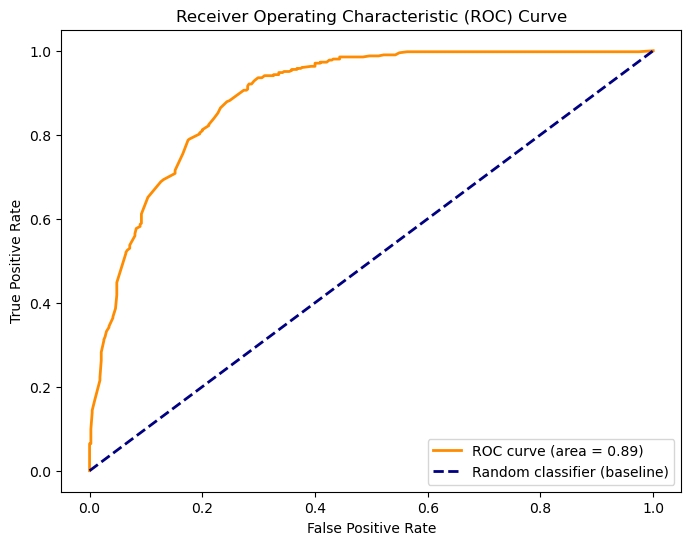

In [ ]:
# Plot ROC curve
fpr, tpr, thresholds = roc_curve(y_test, random_forest_y_pred_prob)
roc_auc = auc(fpr, tpr)
print("Random Forest AUC:", roc_auc)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=2, label='Random classifier (baseline)', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

#### Confusion Matrix

Let's also create a new confusion matrix so that we can ensure that the metrics created are reflective of the model's proficiency:

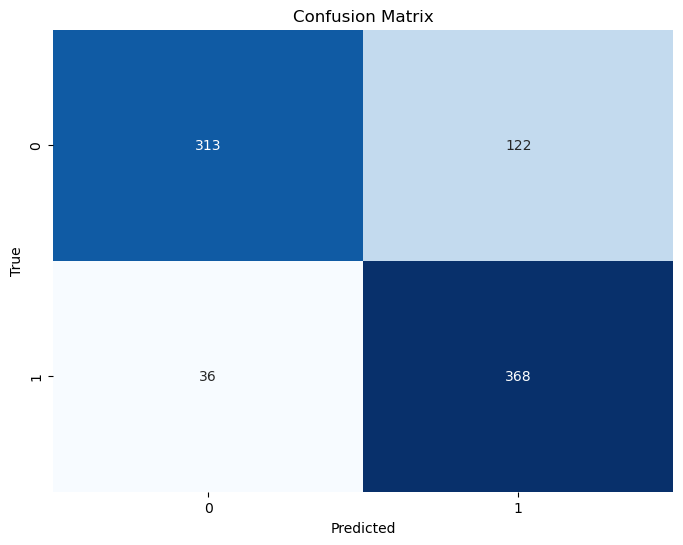

In [ ]:
# Create a confusion matrix
cm = confusion_matrix(y_test, random_forest_y_pred)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=best_rf_clf.classes_, yticklabels=best_rf_clf.classes_)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
TN, FP, FN, TP = cm.ravel()
FPR = FP / (FP + TN)
FNR = FN / (FN + TP)

print("False Positive Rate:", FPR)
print("False Negative Rate:", FNR)

False Positive Rate: 0.28045977011494255
False Negative Rate: 0.0891089108910891


The Random Forest model has a decent ROC curve and has the following statistics:

**Precision:** 0.83

**Recall:** 0.82

**F1-score:** 0.82

**False Positive Rate:** 0.27

**False Negative Rate:** 0.09

The False Positive Rate is fairly high, which is most likely bringing down our AUC score, but this is an otherwise good model. It is able to predict most of our data points correctly, and would likely perform better than the other models.



## Preparing Our Test Data

Now that we have optimized and tested our **Random Forest** model, it is time to test our model on test data to determine the true performance of our model.

First, let's import our test data as a new data frame.

In [ ]:
test_df = pd.read_csv("Phishing_Legitimate_test_student.csv", index_col="id", na_values=['',' ','n/a'])
print(test_df.shape)
test_df.head()

(5000, 37)


,NumDots,SubdomainLevel,PathLevel,UrlLength,NumDash,NumDashInHostname,AtSymbol,TildeSymbol,NumUnderscore,NumPercent,...,ExtFavicon,InsecureForms,RelativeFormAction,ExtFormAction,AbnormalFormAction,RightClickDisabled,PopUpWindow,IframeOrFrame,MissingTitle,ImagesOnlyInForm
id,,,,,,,,,,,,,,,,,,,,,
1,6,1,2,59,0,0,0,0,0,0,...,0,1,0,1,0,0,0,0,0,0
2,2,1,3,76,4,0,0,0,0,0,...,0,1,1,0,1,0,0,1,0,0
3,3,1,1,59,0,0,0,0,3,0,...,0,0,0,0,0,0,0,1,0,0
4,5,1,3,67,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
5,2,0,4,88,3,0,0,0,0,0,...,0,1,1,0,0,0,0,1,0,0


### Data Normalization

Next, we'll need to filter our data frame to only include the seven features that we chose in the previous phase. But before we do that, we have to calculate the *URLCharacterComplexity* column for our test data set.

*URLCharacterComplexity* is not a column that came with our dataset. It is a product of the normalization of several features within our dataset. Since we are importing brand new data as our test data, we will have to create a *URLCharacterComplexity* column for our **test_df** dataframe.

In [ ]:
test_df["URLCharacterComplexity"] = np.mean(test_df[["NumDots", "NumDash", "NumDashInHostname", "NumUnderscore", "NumPercent", "NumAmpersand", "NumHash"]], axis=1)
max_URL_Character_Complexity = test_df['URLCharacterComplexity'].max()
min_URL_Character_Complexity = test_df['URLCharacterComplexity'].min()
test_df["URLCharacterComplexity"] = (test_df["URLCharacterComplexity"]-min_URL_Character_Complexity)/(max_URL_Character_Complexity-min_URL_Character_Complexity)
test_df["URLCharacterComplexity"]

id
1       0.178571
2       0.178571
3       0.178571
4       0.142857
5       0.142857
          ...   
4996    0.107143
4997    0.392857
4998    0.250000
4999    0.035714
5000    0.071429
Name: URLCharacterComplexity, Length: 5000, dtype: float64

### Finalizing Our Data

Finally, it's time to limit our test data frame to only include our seven features.

In [ ]:
cols_to_keep = ["SubdomainLevel", "PathLevel", "NumQueryComponents", "IpAddress", "URLCharacterComplexity", "NumSensitiveWords", "InsecureForms"]
test_df = test_df[cols_to_keep]
test_df.head()

,SubdomainLevel,PathLevel,NumQueryComponents,IpAddress,URLCharacterComplexity,NumSensitiveWords,InsecureForms
id,,,,,,,
1,1,2,0,0,0.178571,1,1
2,1,3,0,0,0.178571,0,1
3,1,1,0,0,0.178571,0,0
4,1,3,0,0,0.142857,0,1
5,0,4,0,0,0.142857,1,1


## Predicting New Values

After all of our work, we can now use our model to predict the values from our dataset.

### Training Our Production Model

Now that we have identified the Random Forest model to be our best, we neeed to train it on all of the data we have istead of just the training data set that we defined beforehand.

| bootstrap | max_depth | min_samples_leaf | min_samples_split | n_estimators |
| --- | --- | --- | --- | --- |
| True | 10 | 2 | 2 | 200 |

In [ ]:
prod_rf_clf = RandomForestClassifier(bootstrap=True,
                                max_depth=10, 
                                min_samples_leaf=2,
                                min_samples_split=2, 
                                n_estimators=200)

# X is our origional dataframe limted to only the seven features we chose earlier
# y is our class label
# See the beginning of Phase V
prod_rf_clf.fit(X, y.values.ravel()) # y.values.ravel() ensures a 1-d array gets passed in.


RandomForestClassifier(max_depth=10, min_samples_leaf=2, n_estimators=200)

### Predicting Values

Nesnt, all that is left is to predict the test values that we were given.

In [ ]:
y_pred = prod_rf_clf.predict(test_df)
y_pred

array([1, 1, 0, ..., 0, 1, 0], dtype=int64)

Great! We have our predicted values. To make the predicted values more acessable, lets export them to a csv file.

In [ ]:
data = {
     "Prediction": y_pred,
}
out = pd.DataFrame(data, index=[test_df.index])
out

,Prediction
id,
1,1
2,1
3,0
4,1
5,1
...,...
4996,1
4997,0
4998,0


In [ ]:
out.to_csv("Predictions.csv")

### Analysis of Phishing Websites

Our analysis shows that many of our selected features line up with many common characteristics of phishing websites. For example, a feature that we have that is commonly used is the IP Address. An example of this in practice is a URL having the IP address in place of the domain name. There is an argument to made that websites that accessing a website purely a website that has the raw IP, it could be sending an end-user to a malicious site. However, if the end user is connecting through a domain name that is being resolved by some DNS server like Quad9 and Cloudflare, the likelihood of this being a phishing website is heavily reduced.

Another feature that is consistent with common phishing websites is the use of Insecure Forms, or the exploitation of vulnerabilities in data submission forms. Phishing sites often employ insecure forms to collect sensitive information, such as login credentials or personal details, without the implementation of security measures. Recognizing these forms is a pivotal ability for the identification of potential phishing threats. Our model is highly adept on this front, as InsecureForms is one of our main features. Thus, we have the ability to flag these suspicious websites.

After testing, our models can also provide us with some compelling insights. The Random Forest algorithm comes out as the frontrunner model, boasting the highest AUC score of 0.8918. Thus, we chose it to be our final production model. The DecisionTree and SVM models also have solid performances, and the MLPRegressor model is the slight lowest performer with an AUC of 0.8184. While our models provide us context regarding phishing website detection, there are some other dimensions to consider.

The findings from an article in the Journal of Ambient Intelligence and Computing shed light on the importance of features extracted from the URL in predicting phishing websites. According to the research, “the accuracy of the proposed features (individually) are comparable with the existing features. Since the features are extracted only from the URL, it provides limited information to analyze and detect phishing sites less significantly” (Rao et al).

Our model, in comparison, focuses on a set of seven features. While they differ from those explored in the article’s application, dubbed “CatchPhish”, we can draw parallels in emphasizing the relevance of specific characteristics in predicting phishing activities. Notably, features like ‘NumSensitiveWords’ and ‘InsecureForms’ may capture aspects similar to the content-based features studied in the research.


[1] Rao, R.S., Vaishnavi, T. & Pais, A.R. CatchPhish: detection of phishing websites by inspecting URLs. J Ambient Intell Human Comput 11, 813–825 (2020). https://doi-org.ezaccess.libraries.psu.edu/10.1007/s12652-019-01311-4

### Executive Summary

In this project, we aimed to develop an effective predicitve model to identify phishing websites. We leveraged machine learning algorithms and multiple different models to do so; in specific, we tested the Decision Tree, Random Forest, SVM, and MLPRegressor models. After extensive testing, the Random Forest algorithm emerged as the optimal choice, as it exhibited the highest AUC score and overall superior performance compared to its peers.

The Random Forest model achieved an AUC score of 0.8918 out of a possible 1.0. This tells us that the model's ability to distinguish between phishing and non-phishing sites is quite high. This perfomance is corroborated by the performance metrics the model produced, such as the precision, recall, and F1-scores all being 0.82 or 0.83. These metrics are all involved in the measurement of the model's accuracy in identifying true positives and avoiding false negatives. Precision is the proportion of correctly identified phishing sites among the predicted positives, recall is the proportion of actual phishing sites correctly identified by our model, and the F1-score is a measure of the model's ability to capture all positive instances. Our high F1-score of 0.83 indicates a well-balanced trade-off between precision and recall. 


The only negatively impacting metric would be our false-positive rate of 0.27. As stated previously, we suspect that this has led to a decrease of our AUC score. However, even with this factor, we have confidence that the Random Forest model is the best performing model to work with and formally accept as our model. Our analysis has also highlighted the crucial role of the 7 features we have chosen in identifying phishing websites and have drawn parellels between these features and characteristics commonly found on phishing websites. 

We believe that our predictive model provides a powerful tool for the company's cybersecurity efforts and believe that the predictions it provides can be leveraged by the security team in order to make assessments regarding the safety and legitimacy of third-party websites. Instances of these assements would be the identification of potential threats, preventing data breaches, and enhancing overall cybersecurity resilience. Additionally, the model could be integrated into pre-existing, automated systems. This could help streamline the process of flagging and addressing potential phishing risks in real-time, allowing for decisive action(s) to be made before any damage to the organization's resources could be inflicted.

Looking ahead, further refinement of the model could involve exploring additional features or incorporating real-time data streams to enhance its predictive capabilities. Continuous monitoring and updates to the model based on emerging threat pattners would ensure its effectiveness in an ever-evolving cybersecurity landscape.